<a href="https://colab.research.google.com/github/ted-marlon/Data-Science/blob/main/Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import scipy
from sklearn.preprocessing import StandardScaler, LabelEncoder,RobustScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [ ]:
df=pd.read_csv('customer_segmentation.csv')

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.rename(columns={
    'Id': 'Identifiant',
    'Year_Birth': 'Annee_Naissance',
    'Education': 'Niveau_Education',
    'Marital_Status': 'Statut_Marital',
    'Income': 'Revenu_Annuel',
    'Kidhome': 'Nb_Jeunes_Enfants',
    'Teenhome': 'Nb_Adolescents',
    'Dt_Customer': 'Date_Inscription',
    'Recency': 'Jours_Dernier_Contact',
    'MntWines': 'Depenses_Vins',
    'MntFruits': 'Depenses_Fruits',
    'MntMeatProducts': 'Depenses_Viande',
    'MntFishProducts': 'Depenses_Poisson',
    'MntSweetProducts': 'Depenses_Sucreries',
    'MntGoldProds': 'Depenses_Produits_Luxe',
    'NumDealsPurchases': 'Nb_Achats_Promos',
    'NumWebPurchases': 'Nb_Achats_Web',
    'NumCatalogPurchases': 'Nb_Achats_Catalogue',
    'NumStorePurchases': 'Nb_Achats_Magasin',
    'NumWebVisitsMonth': 'Nb_Visites_Web_Mensuelles',
    'AcceptedCmp3': 'Campagne3_Acceptee',
    'AcceptedCmp4': 'Campagne4_Acceptee',
    'AcceptedCmp5': 'Campagne5_Acceptee',
    'AcceptedCmp1': 'Campagne1_Acceptee',
    'AcceptedCmp2': 'Campagne2_Acceptee',
    'Complain': 'Reclamation',
    'Z_CostContact': 'Cout_Contact',
    'Z_Revenue': 'Revenu_Campagne',
    'Response': 'Reponse_Campagne'
}, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2240 non-null   int64  
 1   Annee_Naissance            2240 non-null   int64  
 2   Niveau_Education           2240 non-null   object 
 3   Statut_Marital             2240 non-null   object 
 4   Revenu_Annuel              2216 non-null   float64
 5   Nb_Jeunes_Enfants          2240 non-null   int64  
 6   Nb_Adolescents             2240 non-null   int64  
 7   Date_Inscription           2240 non-null   object 
 8   Jours_Dernier_Contact      2240 non-null   int64  
 9   Depenses_Vins              2240 non-null   int64  
 10  Depenses_Fruits            2240 non-null   int64  
 11  Depenses_Viande            2240 non-null   int64  
 12  Depenses_Poisson           2240 non-null   int64  
 13  Depenses_Sucreries         2240 non-null   int64

In [ ]:
df.nunique()

ID                           2240
Annee_Naissance                59
Niveau_Education                5
Statut_Marital                  8
Revenu_Annuel                1974
Nb_Jeunes_Enfants               3
Nb_Adolescents                  3
Date_Inscription              663
Jours_Dernier_Contact         100
Depenses_Vins                 776
Depenses_Fruits               158
Depenses_Viande               558
Depenses_Poisson              182
Depenses_Sucreries            177
Depenses_Produits_Luxe        213
Nb_Achats_Promos               15
Nb_Achats_Web                  15
Nb_Achats_Catalogue            14
Nb_Achats_Magasin              14
Nb_Visites_Web_Mensuelles      16
Campagne3_Acceptee              2
Campagne4_Acceptee              2
Campagne5_Acceptee              2
Campagne1_Acceptee              2
Campagne2_Acceptee              2
Reclamation                     2
Cout_Contact                    1
Revenu_Campagne                 1
Reponse_Campagne                2
dtype: int64

In [ ]:
df.describe(include='all')

,ID,Annee_Naissance,Niveau_Education,Statut_Marital,Revenu_Annuel,Nb_Jeunes_Enfants,Nb_Adolescents,Date_Inscription,Jours_Dernier_Contact,Depenses_Vins,...,Nb_Visites_Web_Mensuelles,Campagne3_Acceptee,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Reclamation,Cout_Contact,Revenu_Campagne,Reponse_Campagne
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


In [ ]:
df.isnull().sum()

ID                            0
Annee_Naissance               0
Niveau_Education              0
Statut_Marital                0
Revenu_Annuel                24
Nb_Jeunes_Enfants             0
Nb_Adolescents                0
Date_Inscription              0
Jours_Dernier_Contact         0
Depenses_Vins                 0
Depenses_Fruits               0
Depenses_Viande               0
Depenses_Poisson              0
Depenses_Sucreries            0
Depenses_Produits_Luxe        0
Nb_Achats_Promos              0
Nb_Achats_Web                 0
Nb_Achats_Catalogue           0
Nb_Achats_Magasin             0
Nb_Visites_Web_Mensuelles     0
Campagne3_Acceptee            0
Campagne4_Acceptee            0
Campagne5_Acceptee            0
Campagne1_Acceptee            0
Campagne2_Acceptee            0
Reclamation                   0
Cout_Contact                  0
Revenu_Campagne               0
Reponse_Campagne              0
dtype: int64

In [ ]:
df_clean= df.dropna(axis=0, how='any')
df_clean

,ID,Annee_Naissance,Niveau_Education,Statut_Marital,Revenu_Annuel,Nb_Jeunes_Enfants,Nb_Adolescents,Date_Inscription,Jours_Dernier_Contact,Depenses_Vins,...,Nb_Visites_Web_Mensuelles,Campagne3_Acceptee,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Reclamation,Cout_Contact,Revenu_Campagne,Reponse_Campagne
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df_clean.isnull().sum()

ID                           0
Annee_Naissance              0
Niveau_Education             0
Statut_Marital               0
Revenu_Annuel                0
Nb_Jeunes_Enfants            0
Nb_Adolescents               0
Date_Inscription             0
Jours_Dernier_Contact        0
Depenses_Vins                0
Depenses_Fruits              0
Depenses_Viande              0
Depenses_Poisson             0
Depenses_Sucreries           0
Depenses_Produits_Luxe       0
Nb_Achats_Promos             0
Nb_Achats_Web                0
Nb_Achats_Catalogue          0
Nb_Achats_Magasin            0
Nb_Visites_Web_Mensuelles    0
Campagne3_Acceptee           0
Campagne4_Acceptee           0
Campagne5_Acceptee           0
Campagne1_Acceptee           0
Campagne2_Acceptee           0
Reclamation                  0
Cout_Contact                 0
Revenu_Campagne              0
Reponse_Campagne             0
dtype: int64

In [ ]:
object_data=df_clean.select_dtypes('object')
numeric_data=df_clean.select_dtypes(('int64','float64'))
numeric_data.drop(columns=['Cout_Contact','Revenu_Campagne'],inplace=True)
object_data.shape,numeric_data.shape,type(object_data),type(numeric_data)

((2216, 3),
 (2216, 24),
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

AttributeError: 'Rectangle' object has no attribute 'patches'

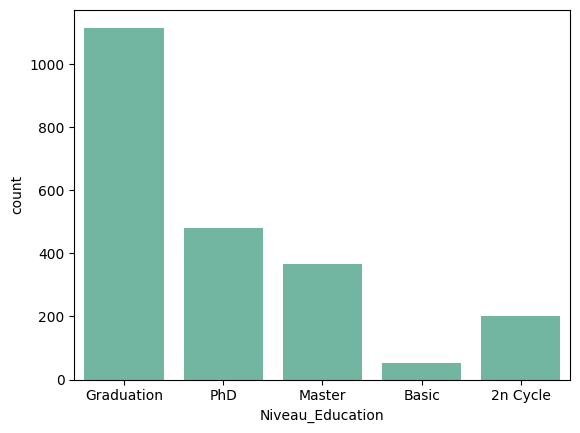

In [ ]:
# Bar chart of education distribution with value labels
sns.set_palette('Set2')
ax = sns.countplot(data=object_data, x='Niveau_Education')

for bar in ax.containers[0]:
    ax.bar_label(bar, padding=3, fontsize=10)

plt.title('Education Distribution')
plt.ylabel('Customer Frequency')
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_2164\4229080295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes = sns.countplot(data= object_data, x= 'Statut_Marital', palette='Set2')


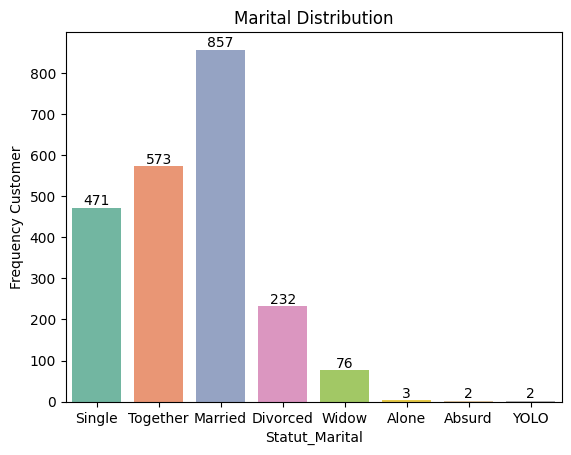

In [ ]:
# DISPLAY MARITAL STATUS

axes = sns.countplot(data= object_data, x= 'Statut_Marital', palette='Set2')

for ax in axes.patches:
    height = ax.get_height()

    axes.text(x = ax.get_x() + ax.get_width() / 2, y = height , s= int(height), ha='center', va='bottom', fontsize=10)

plt.title('Marital Distribution')
plt.ylabel('Frequency Customer')
plt.show()

Text(0.5, 1.0, 'Distribution of marital status based on education')

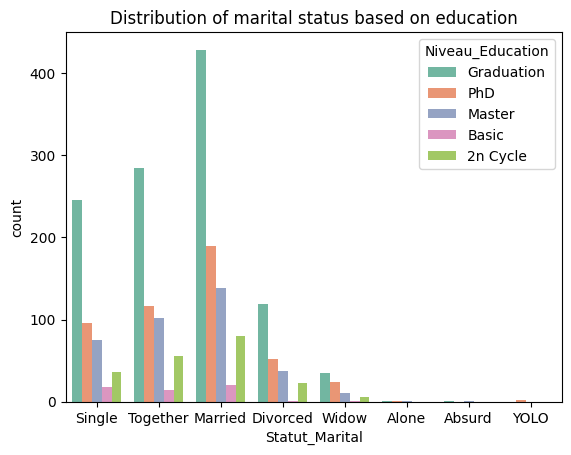

In [ ]:
sns.countplot(data=object_data,x='Statut_Marital',hue='Niveau_Education')
plt.title('Distribution of marital status based on education')

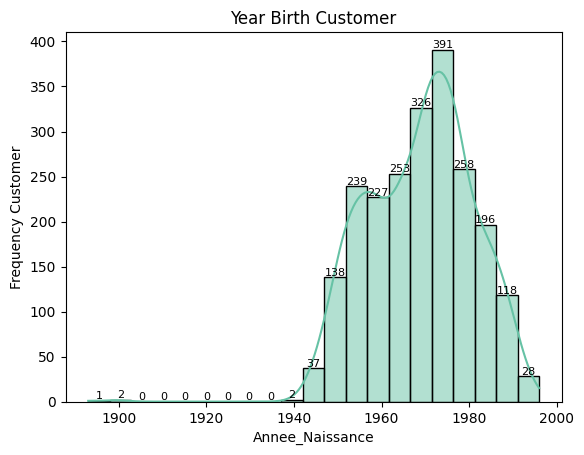

In [ ]:
# Display Year Birth Customer
axes=sns.histplot(data=numeric_data,x='Annee_Naissance',kde=True,binwidth=5)
#Display Value in each Bar
for ax in axes.patches:
    height=ax.get_height()
    axes.text(x = ax.get_x() + ax.get_width() / 2, y = height , s= int(height), ha='center', va='bottom', fontsize=8)

plt.title('Year Birth Customer')
plt.ylabel('Frequency Customer')
plt.show()

Text(0.5, 1.0, 'Distribution of Birth Year Based on Marital Status')

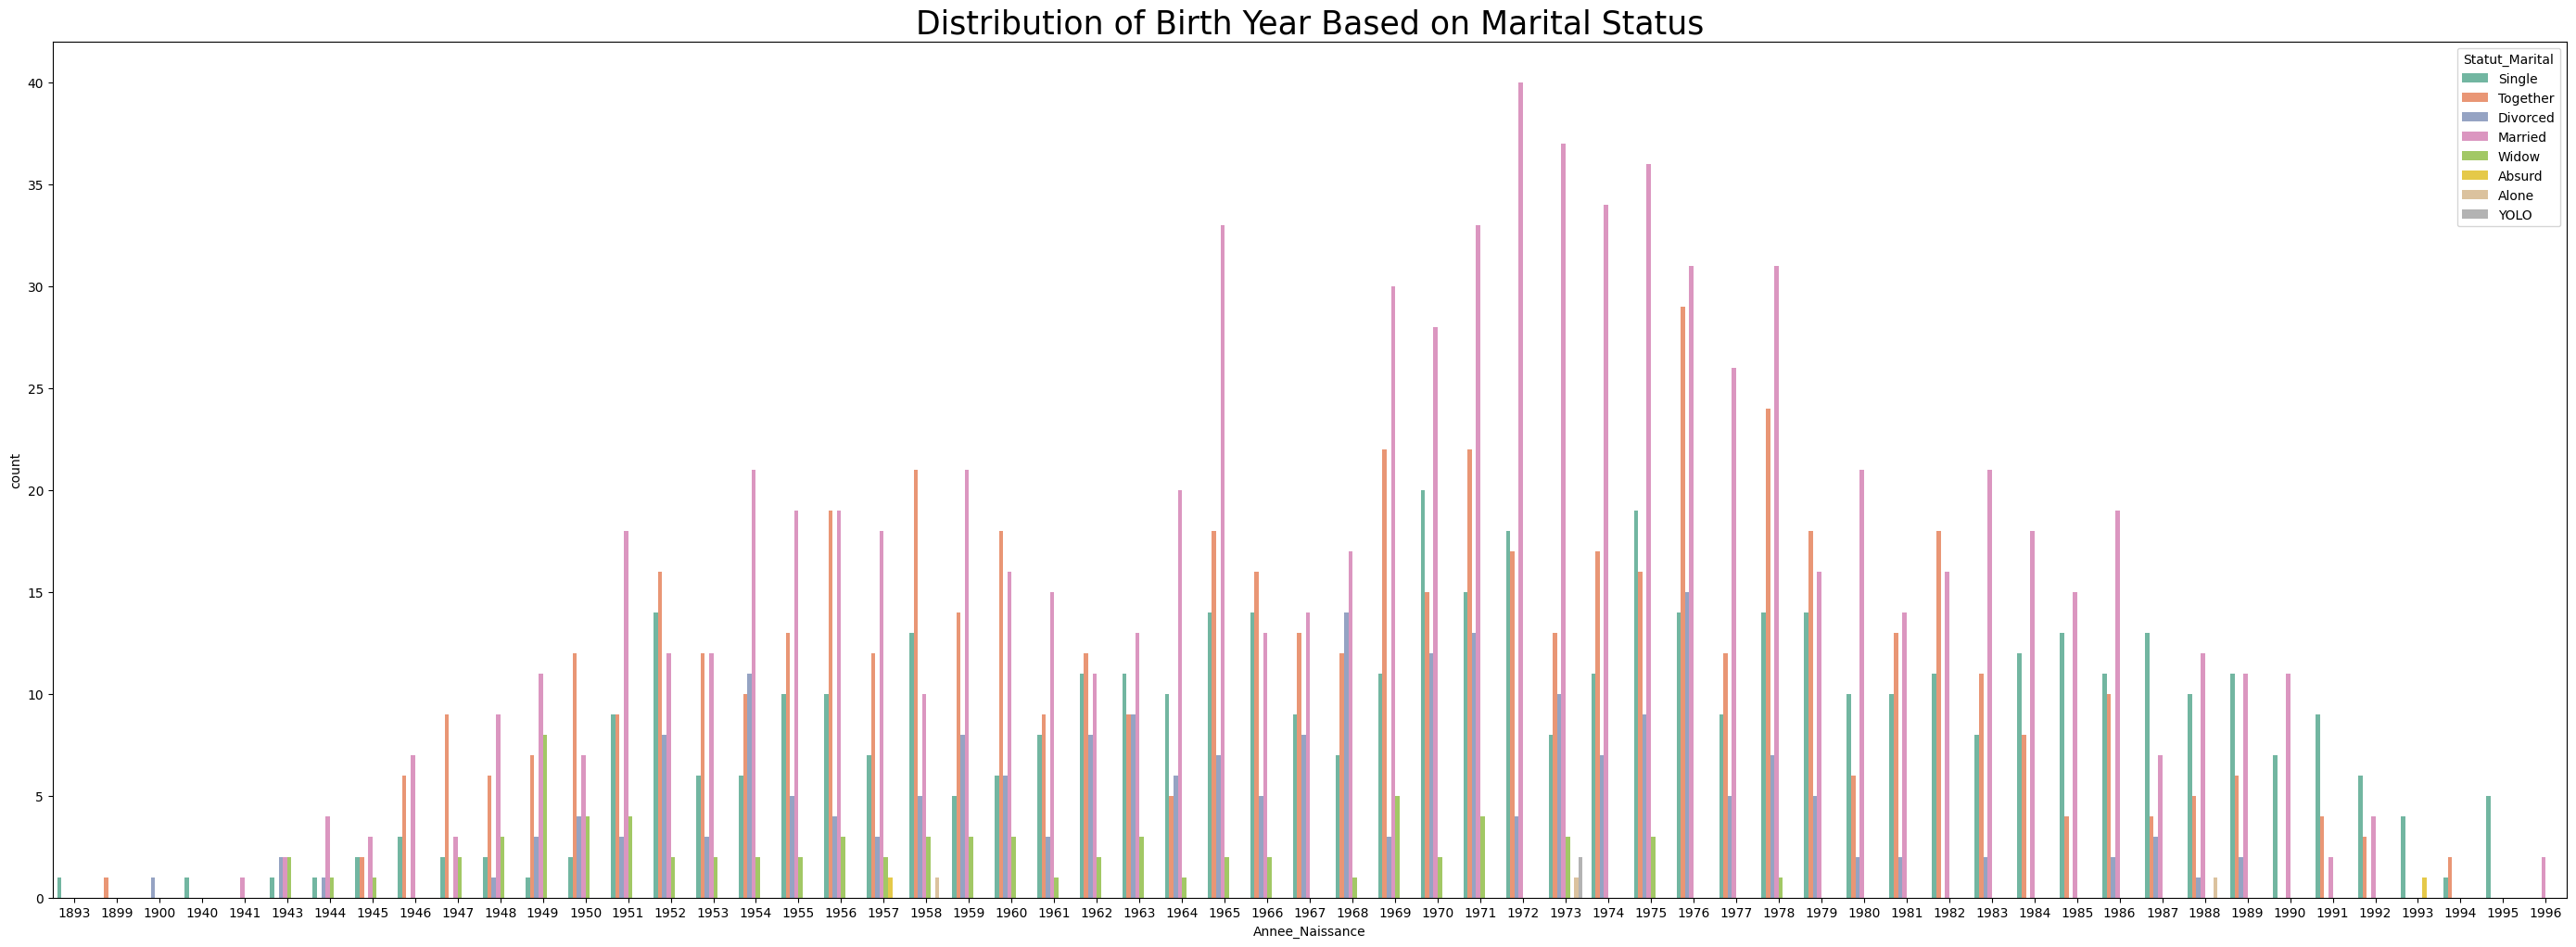

In [ ]:
plt.figure(figsize=(35,12))
sns.countplot(data=df,x='Annee_Naissance',hue='Statut_Marital')
plt.title('Distribution of Birth Year Based on Marital Status',fontsize=25)

C:\Users\hp\AppData\Local\Temp\ipykernel_2164\1524468617.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes=sns.countplot(data=numeric_data,x='Nb_Jeunes_Enfants',palette='pastel',ax=Axes[0])
C:\Users\hp\AppData\Local\Temp\ipykernel_2164\1524468617.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes=sns.countplot(data=numeric_data,x='Nb_Adolescents',palette='pastel',ax=Axes[1])


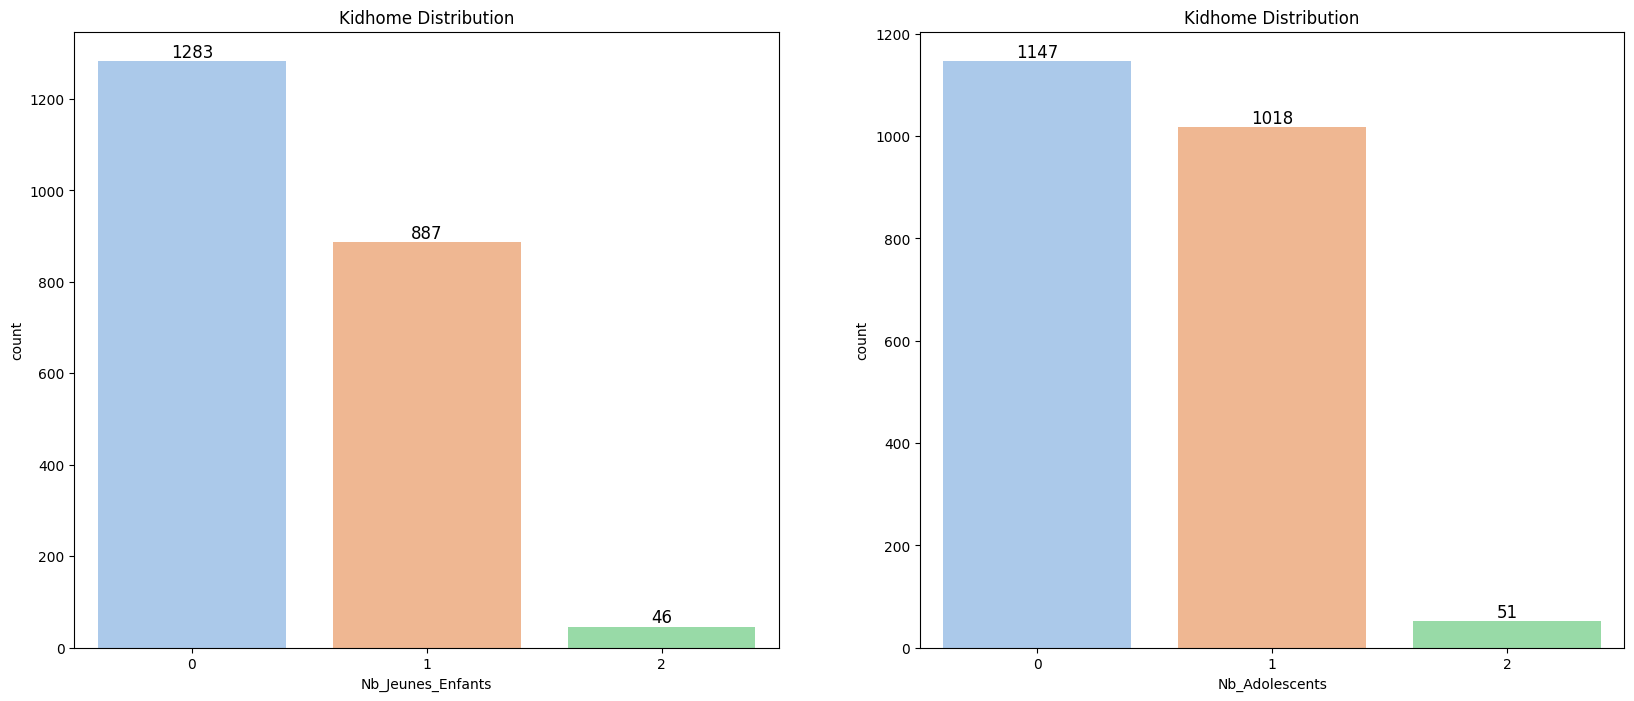

In [ ]:
fig,Axes=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
#Display KIDHOME INFO
axes=sns.countplot(data=numeric_data,x='Nb_Jeunes_Enfants',palette='pastel',ax=Axes[0])
Axes[0].set_title('Kidhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2. , y = height , s=int(height), ha='center', va='bottom',fontsize=12)

#Display TEENHOME INFO
axes=sns.countplot(data=numeric_data,x='Nb_Adolescents',palette='pastel',ax=Axes[1])
Axes[1].set_title('Kidhome Distribution')
for ax in axes.patches:
    height = ax.get_height()
    axes.text(x= ax.get_x() + ax.get_width() / 2. , y = height , s=int(height), ha='center', va='bottom',fontsize=12)

plt.show()

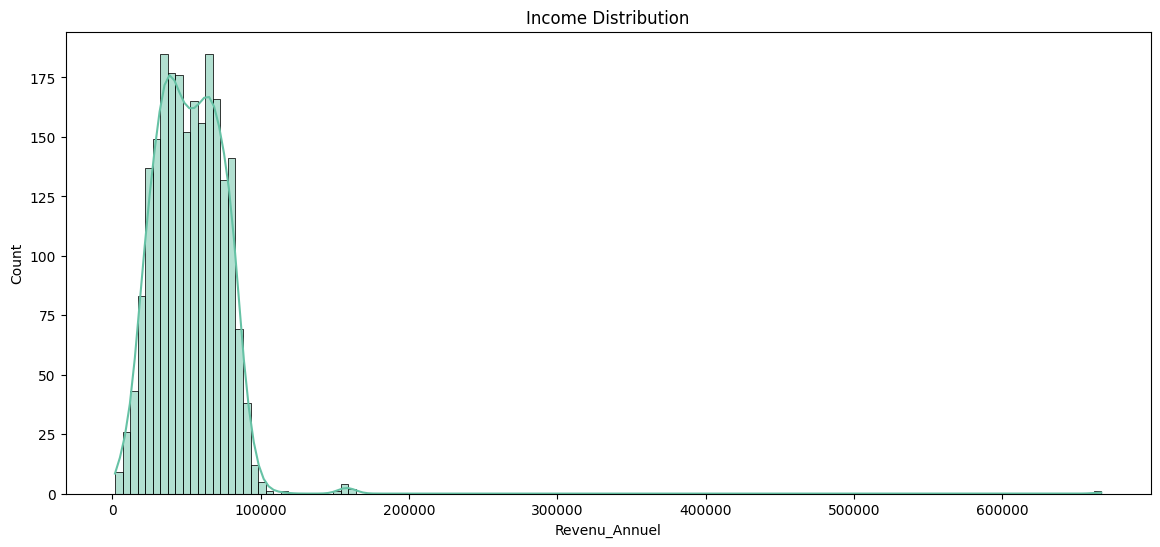

In [ ]:
#Display Income Chart
plt.figure(figsize=(14,6))
sns.histplot(data=numeric_data,x='Revenu_Annuel',kde=True)
plt.title('Income Distribution')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_2164\2383522324.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=numeric_data,y='Revenu_Annuel', palette='deep')
C:\Users\hp\AppData\Local\Temp\ipykernel_2164\2383522324.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=numeric_data,y='Revenu_Annuel', palette='bright')


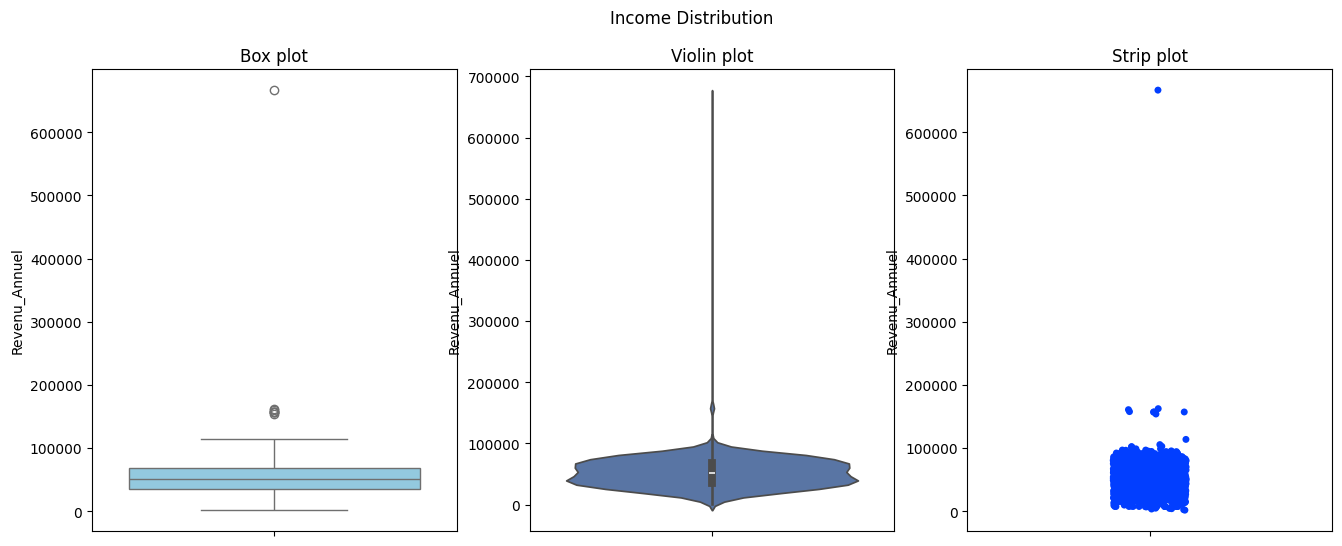

In [ ]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.boxplot(data=numeric_data,y='Revenu_Annuel', color='skyblue')
plt.title('Box plot')

plt.subplot(1,3,2)
sns.violinplot(data=numeric_data,y='Revenu_Annuel', palette='deep')
plt.title('Violin plot')

plt.subplot(1,3,3)
sns.stripplot(data=numeric_data,y='Revenu_Annuel', palette='bright')
plt.title('Strip plot')

plt.suptitle('Income Distribution')
plt.show()

In [ ]:
df_clean=df_clean[df_clean['Revenu_Annuel']<120000]
df_clean

,ID,Annee_Naissance,Niveau_Education,Statut_Marital,Revenu_Annuel,Nb_Jeunes_Enfants,Nb_Adolescents,Date_Inscription,Jours_Dernier_Contact,Depenses_Vins,...,Nb_Visites_Web_Mensuelles,Campagne3_Acceptee,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Reclamation,Cout_Contact,Revenu_Campagne,Reponse_Campagne
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


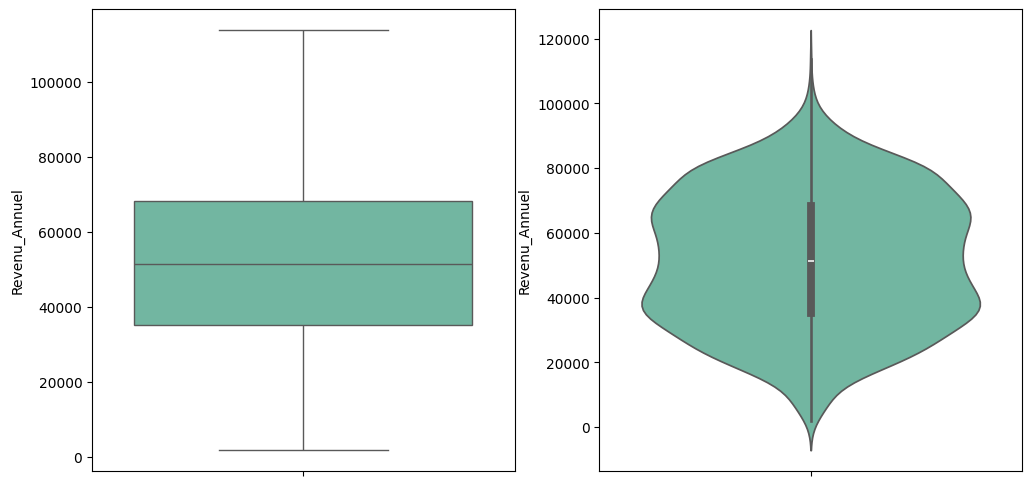

In [ ]:
# CHECK IT BACK

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(data= df_clean, y='Revenu_Annuel')

plt.subplot(1,2,2)
sns.violinplot(data= df_clean, y='Revenu_Annuel')

plt.show()

In [ ]:
fig1=px.histogram(data_frame=df,x='Jours_Dernier_Contact',color='Statut_Marital',title='Recency Distribution bases on Marital Status')
fig2=px.histogram(data_frame=df,x='Jours_Dernier_Contact',color='Niveau_Education',title='Recency Distribution bases on Marital Status')

fig1.show()
fig2.show()

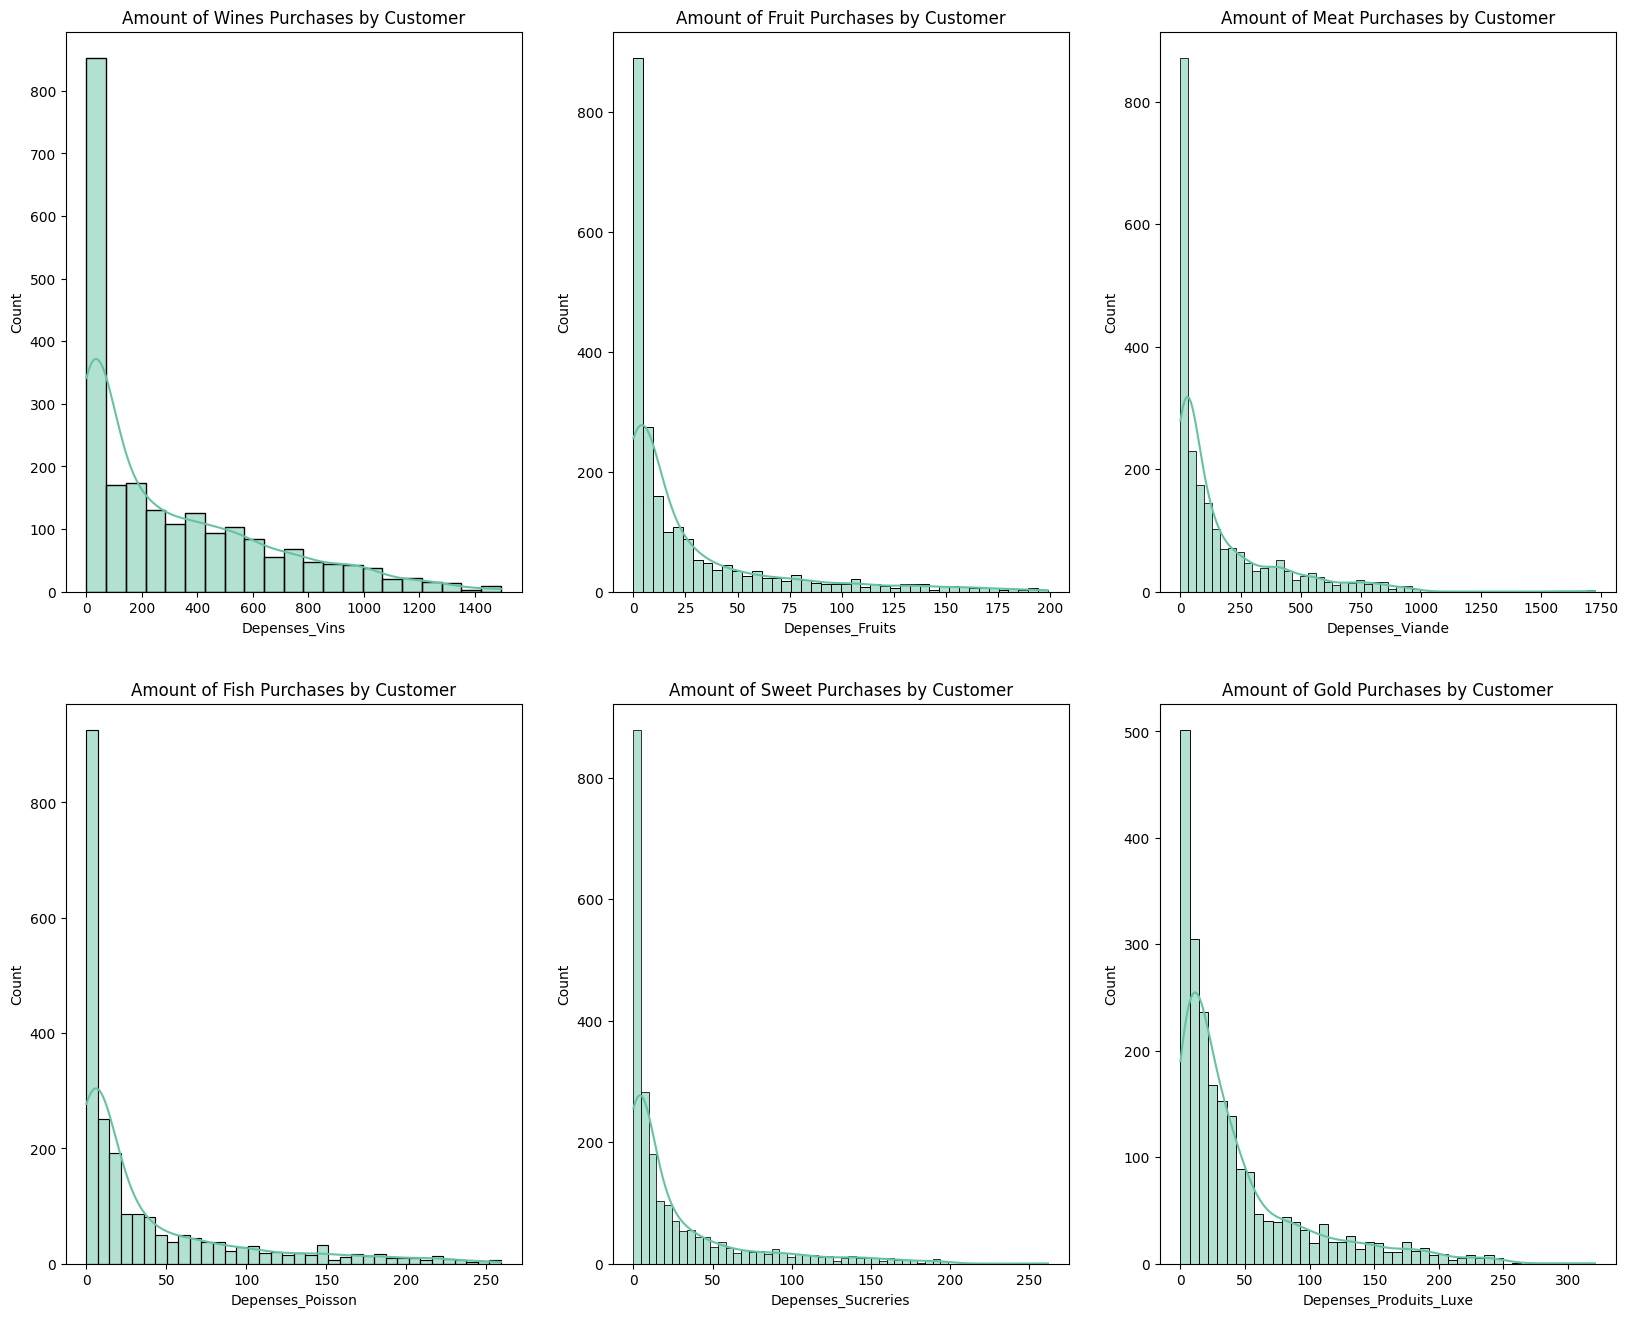

In [ ]:
# DISPLAY 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts', 'MntGoldProds' Columns

fig , axes = plt.subplots(nrows=2, ncols=3, figsize=(20,16))

sns.histplot(data= numeric_data, x='Depenses_Vins', kde=True, ax= axes[0,0])
axes[0,0].set_title('Amount of Wines Purchases by Customer')

sns.histplot(data= numeric_data, x='Depenses_Fruits', kde=True, ax= axes[0,1])
axes[0,1].set_title('Amount of Fruit Purchases by Customer')

sns.histplot(data= numeric_data, x='Depenses_Viande', kde=True, ax= axes[0,2])
axes[0,2].set_title('Amount of Meat Purchases by Customer')

sns.histplot(data= numeric_data, x='Depenses_Poisson', kde=True, ax=axes[1,0])
axes[1,0].set_title('Amount of Fish Purchases by Customer')

sns.histplot(data= numeric_data, x='Depenses_Sucreries', kde=True, ax=axes[1,1])
axes[1,1].set_title('Amount of Sweet Purchases by Customer')

sns.histplot(data= numeric_data, x='Depenses_Produits_Luxe', kde=True, ax=axes[1,2])
axes[1,2].set_title('Amount of Gold Purchases by Customer')


plt.show()

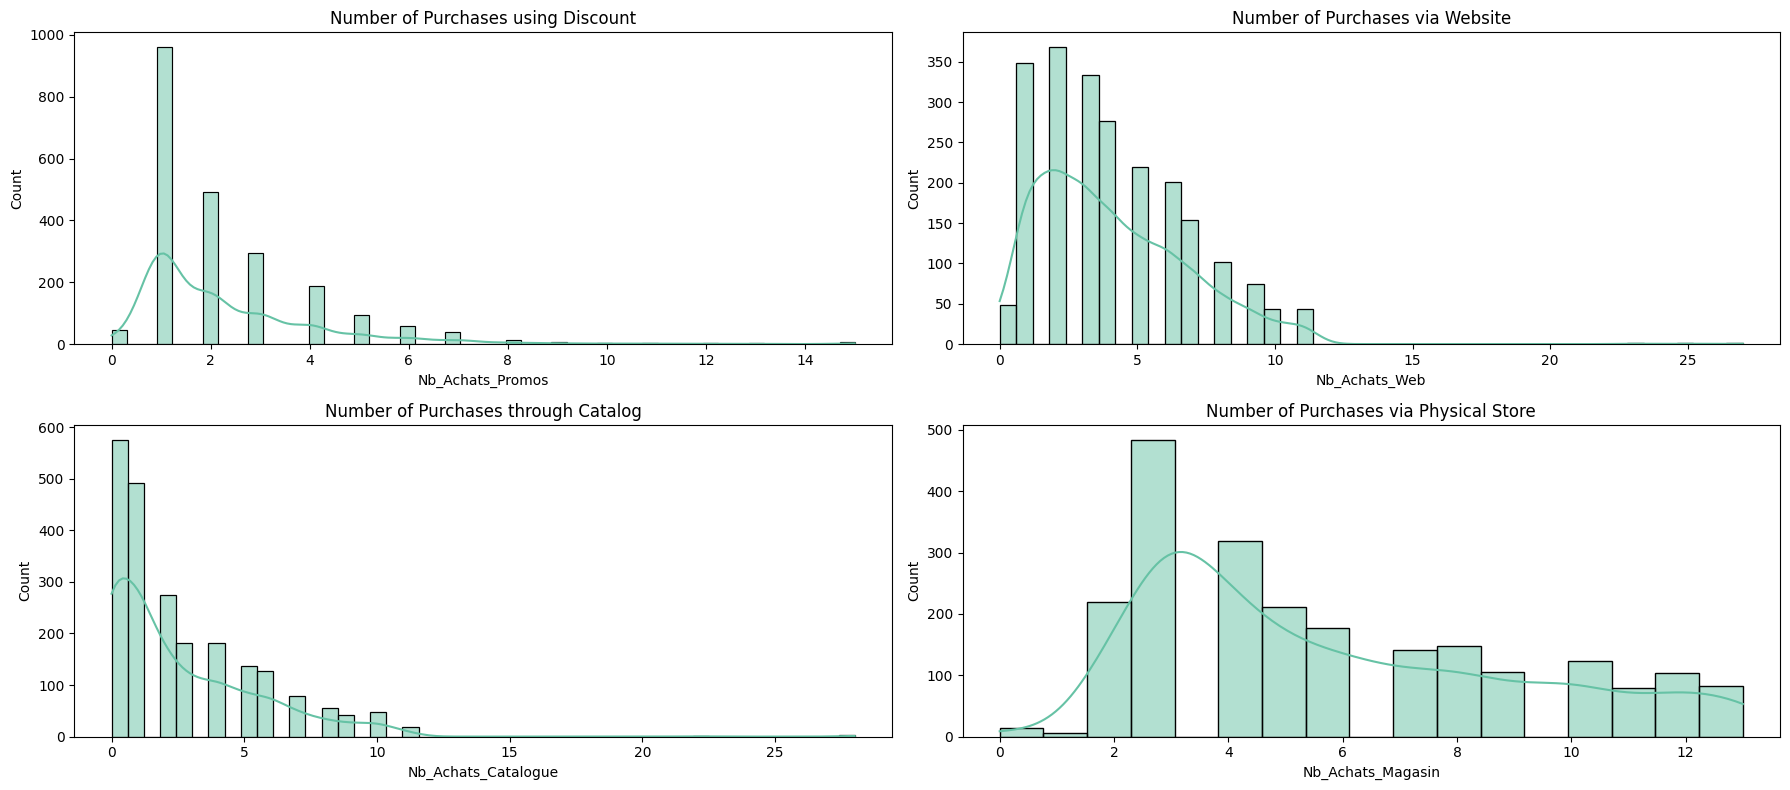

In [ ]:
# DISPLAY 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'
plt.figure(figsize=(18,8))

plt.subplot(2,2,1)
sns.histplot(data= numeric_data, x='Nb_Achats_Promos', kde=True)
plt.title('Number of Purchases using Discount')

plt.subplot(2,2,2)
sns.histplot(data= numeric_data, x='Nb_Achats_Web', kde=True)
plt.title('Number of Purchases via Website')

plt.subplot(2,2,3)
sns.histplot(data= numeric_data, x='Nb_Achats_Catalogue', kde=True)
plt.title('Number of Purchases through Catalog')

plt.subplot(2,2,4)
sns.histplot(data= numeric_data, x='Nb_Achats_Magasin', kde=True)
plt.title('Number of Purchases via Physical Store')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['ID', 'Annee_Naissance', 'Niveau_Education', 'Statut_Marital',
       'Revenu_Annuel', 'Nb_Jeunes_Enfants', 'Nb_Adolescents',
       'Date_Inscription', 'Jours_Dernier_Contact', 'Depenses_Vins',
       'Depenses_Fruits', 'Depenses_Viande', 'Depenses_Poisson',
       'Depenses_Sucreries', 'Depenses_Produits_Luxe', 'Nb_Achats_Promos',
       'Nb_Achats_Web', 'Nb_Achats_Catalogue', 'Nb_Achats_Magasin',
       'Nb_Visites_Web_Mensuelles', 'Campagne3_Acceptee', 'Campagne4_Acceptee',
       'Campagne5_Acceptee', 'Campagne1_Acceptee', 'Campagne2_Acceptee',
       'Reclamation', 'Cout_Contact', 'Revenu_Campagne', 'Reponse_Campagne'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_2164\2905861570.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




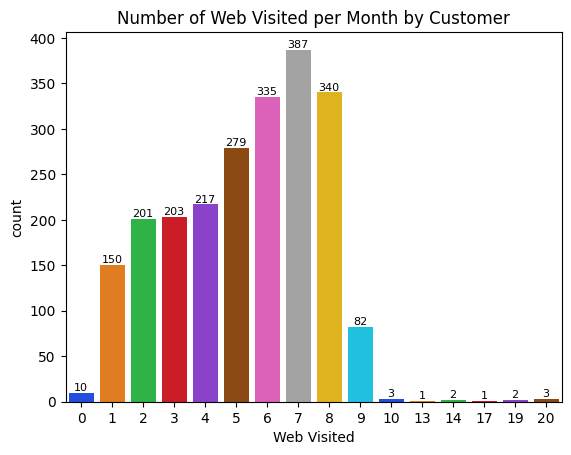

In [ ]:
# DISPLAY NumWebVisitsMonth Histogram
axes = sns.countplot(data= numeric_data, x= 'Nb_Visites_Web_Mensuelles', palette='bright')

for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2, y= ax.get_height(), s= int(ax.get_height()), ha='center', va='bottom', fontsize=8)
plt.title('Number of Web Visited per Month by Customer')
plt.xlabel('Web Visited')
plt.show()

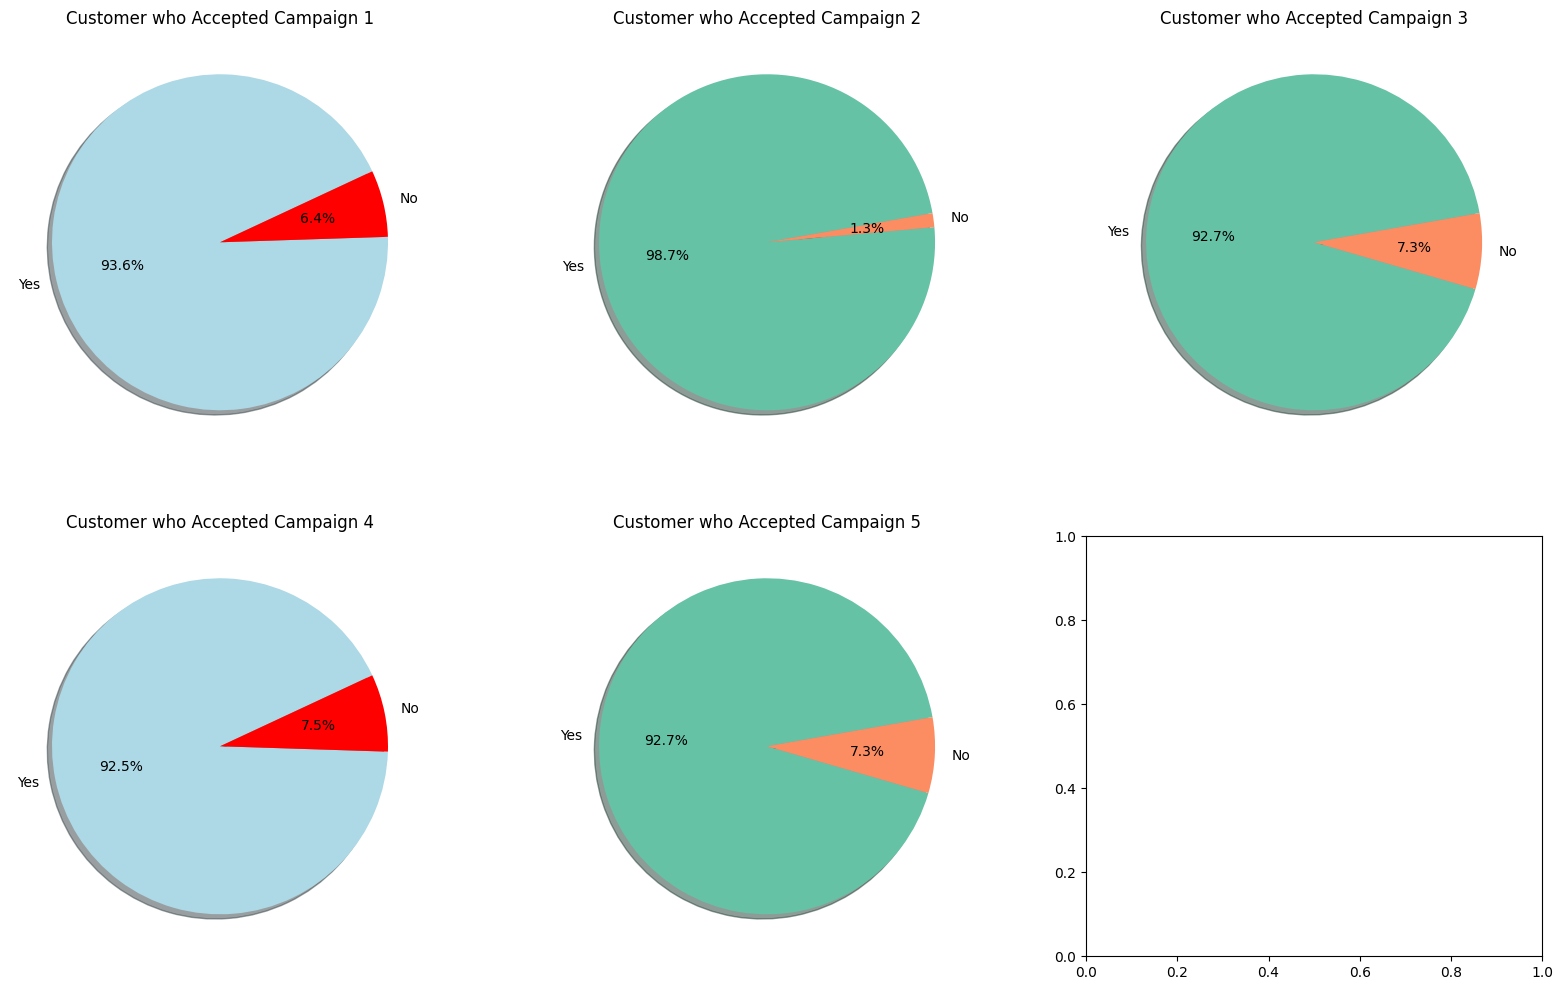

In [ ]:
# DISPLAY 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','AcceptedCmp1', 'AcceptedCmp2'
fig, axes = plt.subplots(nrows= 2, ncols=3, figsize=(20,12))

axes[0,0].pie(df['Campagne1_Acceptee'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%',startangle=25, shadow=True, colors=['lightblue','red'])
axes[0,0].set_title('Customer who Accepted Campaign 1')

axes[0,1].pie(df['Campagne2_Acceptee'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[0,1].set_title('Customer who Accepted Campaign 2')

axes[0,2].pie(df['Campagne3_Acceptee'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[0,2].set_title('Customer who Accepted Campaign 3')

axes[1,0].pie(df['Campagne4_Acceptee'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%',startangle=25, shadow=True, colors=['lightblue','red'])
axes[1,0].set_title('Customer who Accepted Campaign 4')

axes[1,1].pie(df['Campagne5_Acceptee'].value_counts(), labels=['Yes','No'], autopct='%1.1f%%', startangle=10, shadow=True)
axes[1,1].set_title('Customer who Accepted Campaign 5')

axes[1,2] = None

Text(0.5, 1.0, 'Customer that Response to the Campaign')

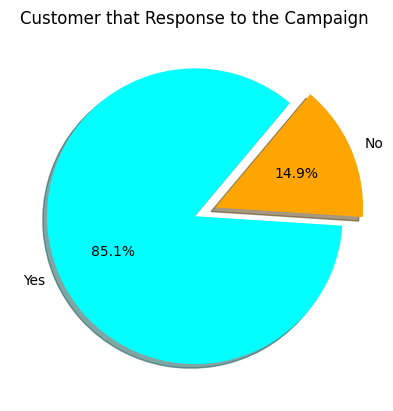

In [ ]:
# DISPLAY RESPONSE CUSTOMER
plt.pie(df.Reponse_Campagne.value_counts(), autopct='%1.1f%%', shadow=True, explode=[0,0.15], startangle= 50, colors=['cyan','orange'], labels=['Yes','No'])
plt.title('Customer that Response to the Campaign')

C:\Users\hp\AppData\Local\Temp\ipykernel_2164\2531160288.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




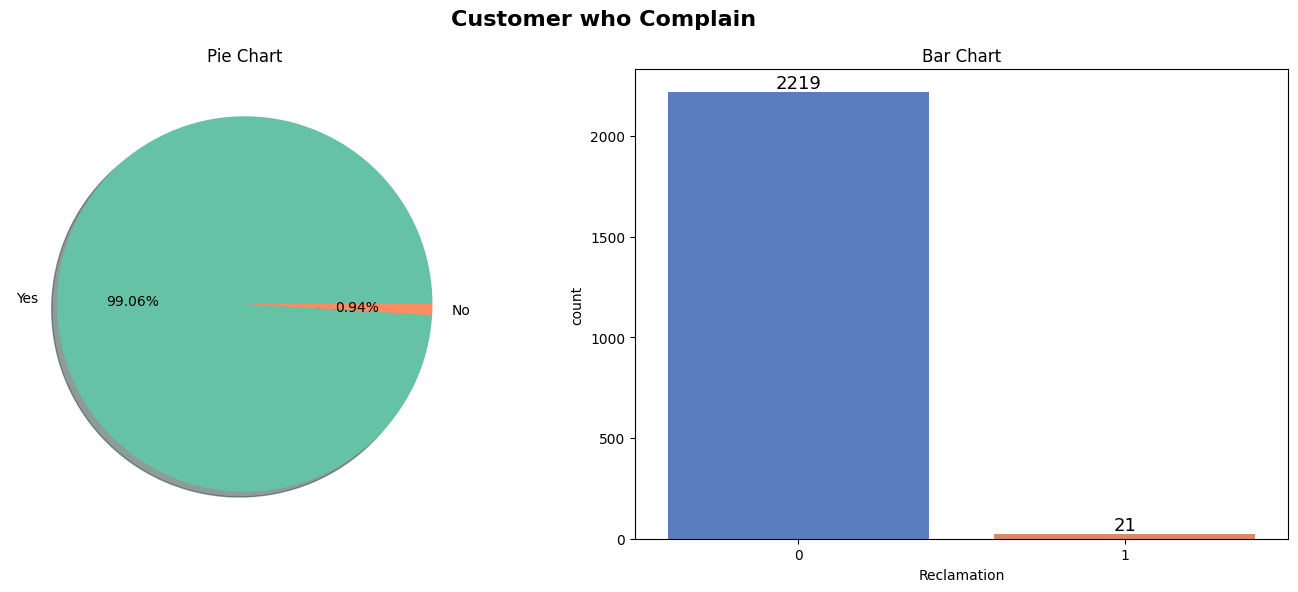

In [ ]:
#CUSTOMER WHO COMPLAIN
plt.figure(figsize=(14,6))
# SHOW PIE CHART
plt.subplot(1,2,1)
plt.pie(x = df['Reclamation'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%', shadow=True)
plt.title('Pie Chart')

# SHOW BAR CHART
plt.subplot(1,2,2)
axes = sns.countplot(data= df, x='Reclamation', palette='muted')
plt.title('Bar Chart')

for ax in axes.patches:
    axes.text(x= ax.get_x() + ax.get_width() / 2, y= ax.get_height(), s= int(ax.get_height()), ha='center', va='bottom', fontsize=13)

plt.suptitle('Customer who Complain',fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# CONVERT EDUCATION AND MARITAL STATUS USING LABEL ENCODER
encoder = LabelEncoder()
df_clean['Niveau_Education'] = encoder.fit_transform(df_clean['Niveau_Education'])
df_clean['Statut_Marital'] = encoder.fit_transform(df_clean['Statut_Marital'])

df.head(4)

C:\Users\hp\AppData\Local\Temp\ipykernel_2164\2184032702.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_2164\2184032702.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Annee_Naissance,Niveau_Education,Statut_Marital,Revenu_Annuel,Nb_Jeunes_Enfants,Nb_Adolescents,Date_Inscription,Jours_Dernier_Contact,Depenses_Vins,...,Nb_Visites_Web_Mensuelles,Campagne3_Acceptee,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Reclamation,Cout_Contact,Revenu_Campagne,Reponse_Campagne
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0


In [ ]:
# ADD NEW 'AGE' FEATURE and 'Total items Purchases' Feature'
# DECLARE CURRENT YEAR
current_year = datetime.now().year

df_clean['Age'] = current_year - df_clean['Annee_Naissance']
df_clean['Total'] = df_clean['Depenses_Vins'] + df_clean['Depenses_Fruits'] + df_clean['Depenses_Viande'] + df_clean['Depenses_Poisson'] + df_clean['Depenses_Sucreries'] + df_clean['Depenses_Produits_Luxe']

df_clean.head(4)

C:\Users\hp\AppData\Local\Temp\ipykernel_2164\1555383706.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hp\AppData\Local\Temp\ipykernel_2164\1555383706.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ID,Annee_Naissance,Niveau_Education,Statut_Marital,Revenu_Annuel,Nb_Jeunes_Enfants,Nb_Adolescents,Date_Inscription,Jours_Dernier_Contact,Depenses_Vins,...,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Reclamation,Cout_Contact,Revenu_Campagne,Reponse_Campagne,Age,Total
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,71,27
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,60,776
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,41,53


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2208 non-null   int64  
 1   Annee_Naissance            2208 non-null   int64  
 2   Niveau_Education           2208 non-null   int64  
 3   Statut_Marital             2208 non-null   int64  
 4   Revenu_Annuel              2208 non-null   float64
 5   Nb_Jeunes_Enfants          2208 non-null   int64  
 6   Nb_Adolescents             2208 non-null   int64  
 7   Date_Inscription           2208 non-null   object 
 8   Jours_Dernier_Contact      2208 non-null   int64  
 9   Depenses_Vins              2208 non-null   int64  
 10  Depenses_Fruits            2208 non-null   int64  
 11  Depenses_Viande            2208 non-null   int64  
 12  Depenses_Poisson           2208 non-null   int64  
 13  Depenses_Sucreries         2208 non-null   int64  
 1

In [ ]:
df_clean

,ID,Annee_Naissance,Niveau_Education,Statut_Marital,Revenu_Annuel,Nb_Jeunes_Enfants,Nb_Adolescents,Date_Inscription,Jours_Dernier_Contact,Depenses_Vins,...,Campagne4_Acceptee,Campagne5_Acceptee,Campagne1_Acceptee,Campagne2_Acceptee,Reclamation,Cout_Contact,Revenu_Campagne,Reponse_Campagne,Age,Total
0,5524,1957,2,4,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,68,1617
1,2174,1954,2,4,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,71,27
2,4141,1965,2,5,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,60,776
3,6182,1984,2,5,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,41,53
4,5324,1981,4,3,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,44,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,58,1341
2236,4001,1946,4,5,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,79,444
2237,7270,1981,2,2,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,44,1241
2238,8235,1956,3,5,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,69,843


In [ ]:
cols_to_cluster = [
    'Revenu_Annuel',
    'Age',
    'Niveau_Education',
    'Statut_Marital',
    'Nb_Jeunes_Enfants',
    'Nb_Adolescents',
    'Jours_Dernier_Contact',
    'Depenses_Vins',
    'Depenses_Fruits',
    'Depenses_Viande',
    'Depenses_Poisson',
    'Depenses_Sucreries',
    'Depenses_Produits_Luxe',
    'Total',
    'Nb_Achats_Promos',
    'Nb_Achats_Web',
    'Nb_Achats_Catalogue',
    'Nb_Achats_Magasin',
]

In [ ]:
df_cluster = df_clean[cols_to_cluster]

df_cluster

,Revenu_Annuel,Age,Niveau_Education,Statut_Marital,Nb_Jeunes_Enfants,Nb_Adolescents,Jours_Dernier_Contact,Depenses_Vins,Depenses_Fruits,Depenses_Viande,Depenses_Poisson,Depenses_Sucreries,Depenses_Produits_Luxe,Total,Nb_Achats_Promos,Nb_Achats_Web,Nb_Achats_Catalogue,Nb_Achats_Magasin
0,58138.0,68,2,4,0,0,58,635,88,546,172,88,88,1617,3,8,10,4
1,46344.0,71,2,4,1,1,38,11,1,6,2,1,6,27,2,1,1,2
2,71613.0,60,2,5,0,0,26,426,49,127,111,21,42,776,1,8,2,10
3,26646.0,41,2,5,1,0,26,11,4,20,10,3,5,53,2,2,0,4
4,58293.0,44,4,3,1,0,94,173,43,118,46,27,15,422,5,5,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,58,2,3,0,1,46,709,43,182,42,118,247,1341,2,9,3,4
2236,64014.0,79,4,5,2,1,56,406,0,30,0,0,8,444,7,8,2,5
2237,56981.0,44,2,2,0,0,91,908,48,217,32,12,24,1241,1,2,3,13
2238,69245.0,69,3,5,0,1,8,428,30,214,80,30,61,843,2,6,5,10


In [ ]:
#
# CHOOSE FEATURE TO NORMALIZE
cols_to_normalize = ['Revenu_Annuel']
# FIT MODEL
robust = RobustScaler()
df_cluster[cols_to_normalize] = robust.fit_transform(df_cluster[cols_to_normalize])

df_cluster.head(5)


C:\Users\hp\AppData\Local\Temp\ipykernel_2164\834573426.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Revenu_Annuel,Age,Niveau_Education,Statut_Marital,Nb_Jeunes_Enfants,Nb_Adolescents,Jours_Dernier_Contact,Depenses_Vins,Depenses_Fruits,Depenses_Viande,Depenses_Poisson,Depenses_Sucreries,Depenses_Produits_Luxe,Total,Nb_Achats_Promos,Nb_Achats_Web,Nb_Achats_Catalogue,Nb_Achats_Magasin
0,0.206595,68,2,4,0,0,58,635,88,546,172,88,88,1617,3,8,10,4
1,-0.149787,71,2,4,1,1,38,11,1,6,2,1,6,27,2,1,1,2
2,0.613771,60,2,5,0,0,26,426,49,127,111,21,42,776,1,8,2,10
3,-0.745005,41,2,5,1,0,26,11,4,20,10,3,5,53,2,2,0,4
4,0.211279,44,4,3,1,0,94,173,43,118,46,27,15,422,5,5,3,6


In [ ]:
df_cluster['Revenu_Annuel'].describe()

count    2208.000000
mean        0.010051
std         0.625900
min        -1.497896
25%        -0.486648
50%         0.000000
75%         0.513352
max         1.886550
Name: Revenu_Annuel, dtype: float64

<Axes: >

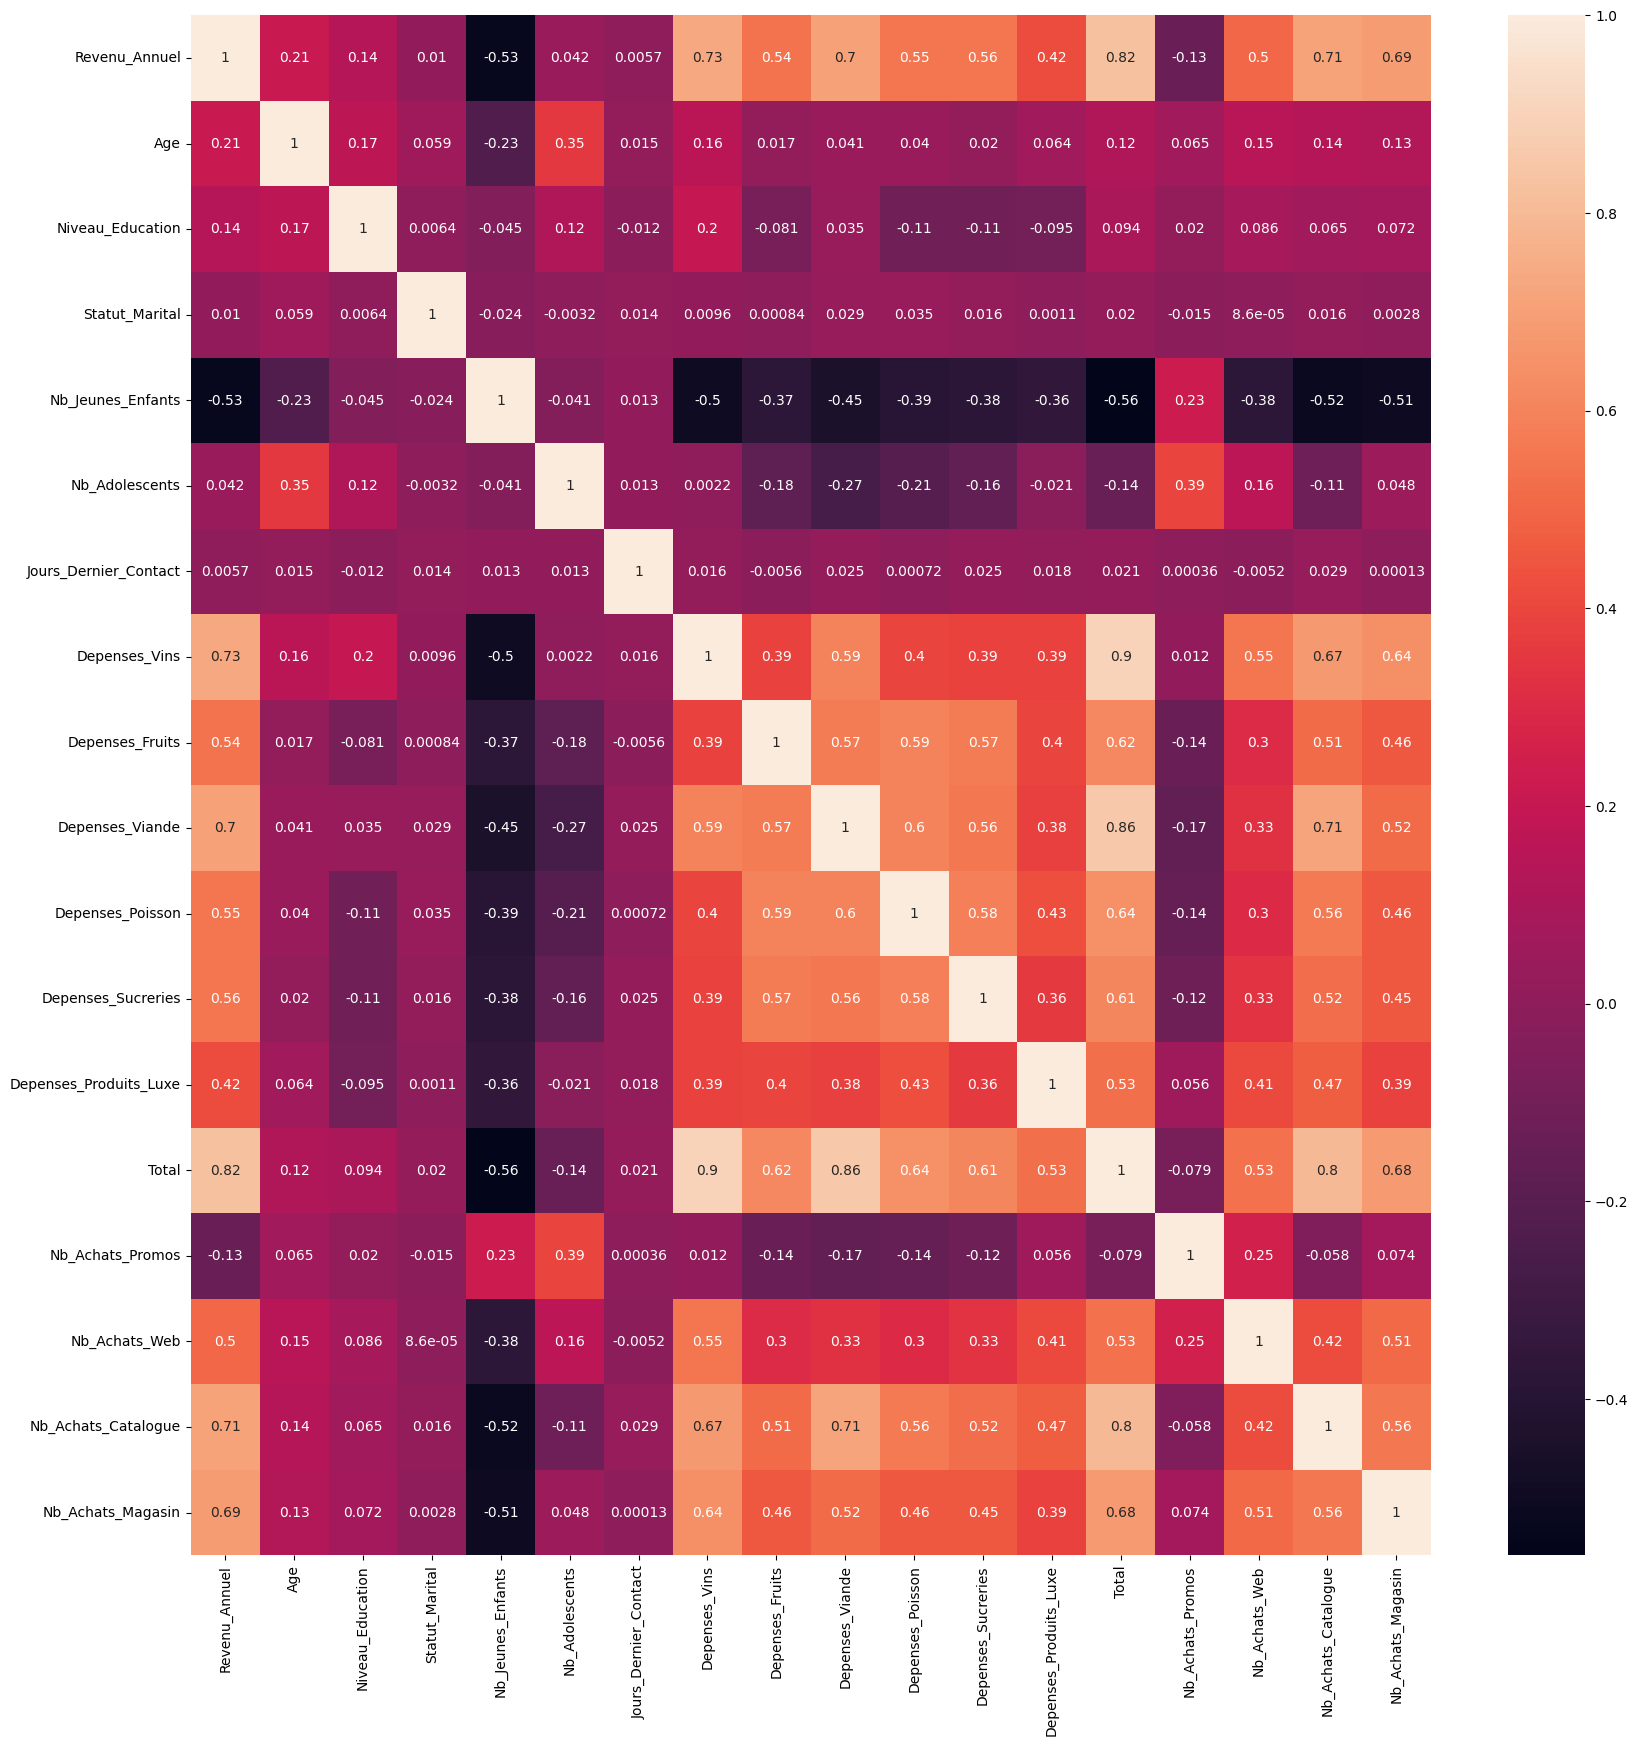

In [ ]:
# CORRELATION

data_corr = df_cluster.corr('pearson')

plt.figure(figsize=(20,20))
sns.heatmap(data= data_corr, annot=True)

C:\Users\hp\ml\my_env\lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.

C:\Users\hp\ml\my_env\lib\site-packages\seaborn\matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



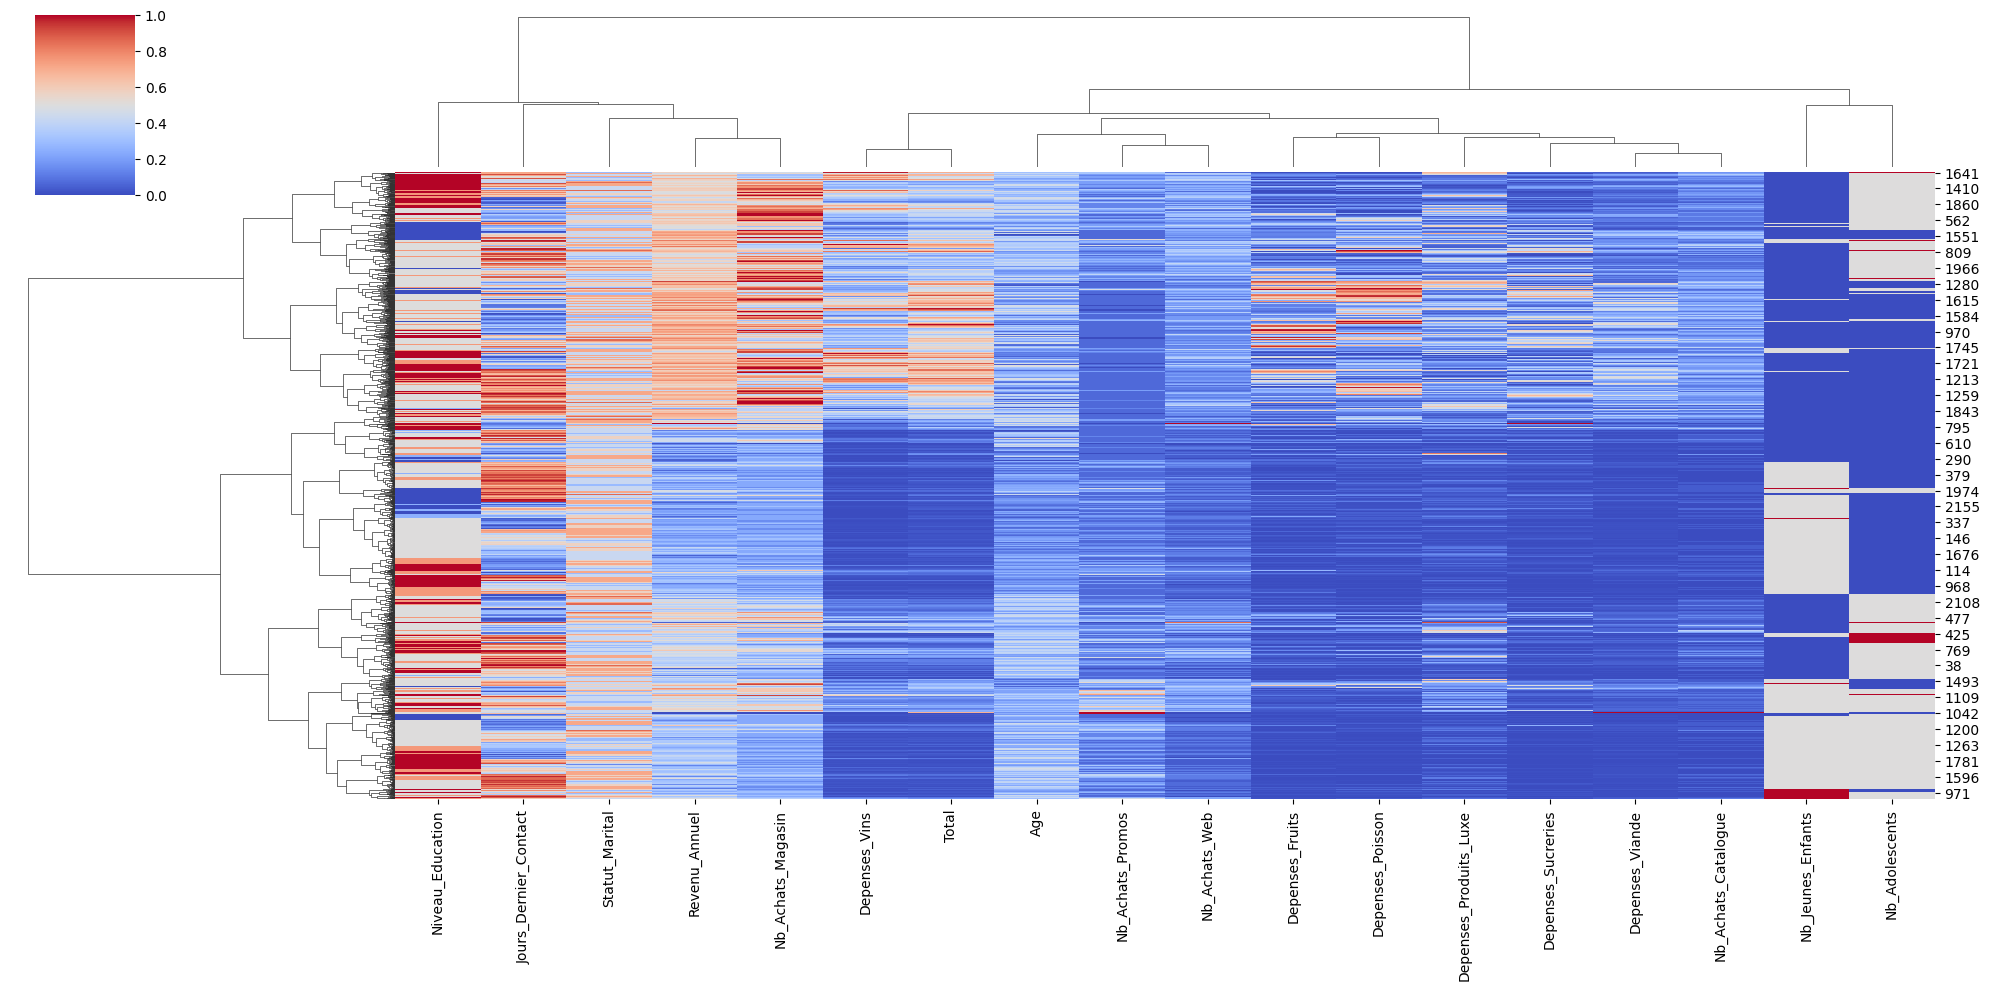

In [ ]:
sns.clustermap(data=df_cluster,cmap='coolwarm',figsize=(20,10),standard_scale=1,metric='euclidean',method='ward')

In [ ]:
# REDUCE DIMENSION
pca = PCA(n_components= None)

data_reduced = pca.fit_transform(df_cluster)

print(f'Number of Components : {pca.n_components_}\n')
print(f'Ratio every Component / PC : \n{pca.explained_variance_ratio_}\n')
print(f'PCA Components : \n{pca.components_}\n')
print(f'Eigen Value of Components : \n{pca.explained_variance_}\n')
print(f'Feature of Components : \n{pca.feature_names_in_}')

Number of Components : 18

Ratio every Component / PC : 
[9.25686791e-01 5.71431801e-02 9.15704367e-03 3.07316232e-03
 1.77640757e-03 1.57262590e-03 1.29412369e-03 2.61194016e-04
 1.24356307e-05 7.89126321e-06 5.14195038e-06 4.94489781e-06
 2.15973172e-06 2.05391774e-06 4.10655338e-07 2.81115974e-07
 1.52408020e-07 5.00232940e-18]

PCA Components : 
[[ 7.30191278e-04  2.08499415e-03  1.80488392e-04  2.98365795e-05
  -4.23531233e-04 -9.63807896e-05  8.62561153e-04  4.42320182e-01
   3.31484941e-02  2.60219178e-01  4.76881930e-02  3.39262762e-02
   3.74952790e-02  8.54797602e-01 -1.86204204e-04  2.09427769e-03
   3.14633978e-03  3.13936089e-03]
 [-1.93635862e-04  8.37491278e-03  1.34931554e-03 -1.43602237e-04
   2.43669428e-05  9.72813583e-04 -1.82953959e-03  7.39481652e-01
  -7.37322277e-02 -6.30638009e-01 -1.11454548e-01 -7.17531243e-02
  -2.93802593e-02 -1.77476517e-01  2.20759547e-03  2.80878221e-03
  -2.06819696e-03  1.02613145e-03]
 [-5.41311729e-04 -4.70379081e-04  3.74390963e-03 

In [ ]:
highest_variance_PC = pca.components_[:3]

PC_df = pd.DataFrame(highest_variance_PC.T, index=df_cluster.columns, columns=['PC1','PC2','PC3'])
PC_df = PC_df.sort_values(by=['PC1','PC2','PC3'], ascending=False)
PC_df

,PC1,PC2,PC3
Total,0.854798,-0.177477,-0.301969
Depenses_Vins,0.442320,0.739482,0.333076
Depenses_Viande,0.260219,-0.630638,0.613811
Depenses_Poisson,0.047688,-0.111455,-0.377551
Depenses_Produits_Luxe,0.037495,-0.029380,-0.420493
Depenses_Sucreries,0.033926,-0.071753,-0.225943
Depenses_Fruits,0.033148,-0.073732,-0.224870
Nb_Achats_Catalogue,0.003146,-0.002068,-0.003002
Nb_Achats_Magasin,0.003139,0.001026,-0.006094
Nb_Achats_Web,0.002094,0.002809,-0.006515


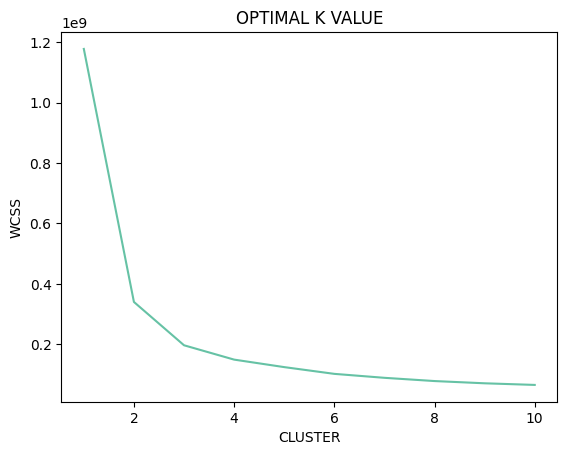

In [ ]:
from sklearn.cluster import KMeans
# FIND K-OPTIMAL WITH ELBOW METHOD
k_range = range(1,11)
inertia = []

for k in k_range:
    kmean = KMeans(n_clusters=k , init='k-means++', random_state=12, n_init=10)
    kmean.fit(data_reduced)  # FIT THE MODEL
    inertia.append(kmean.inertia_)  # GET THE COST FUNCTION

plt.plot(k_range, inertia)
plt.title('OPTIMAL K VALUE')
plt.xlabel('CLUSTER')
plt.ylabel('WCSS')
plt.show()


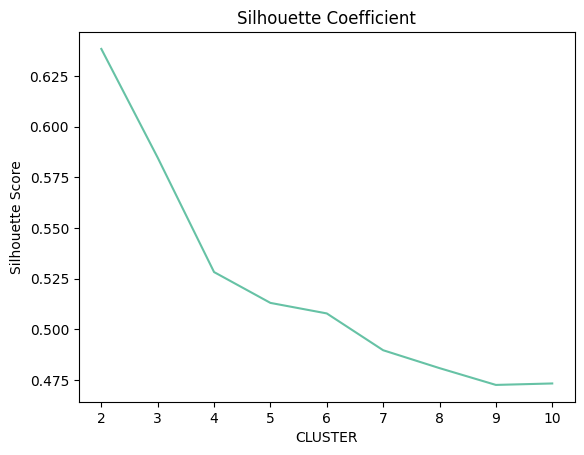

In [ ]:
# CHECK HOW GOOD THE CLUSTER USING SILHOUETTE COEFFICIENT

k_range = range(2,11)
sil_scores = []

for k in k_range:
    kmean = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=10)
    kmean.fit(data_reduced)
    label = kmean.labels_
    sil_score = silhouette_score(X= data_reduced, labels=label, metric='euclidean')
    sil_scores.append(sil_score)

plt.plot(k_range, sil_scores)
plt.title('Silhouette Coefficient')
plt.xlabel('CLUSTER')
plt.ylabel('Silhouette Score')
plt.show()

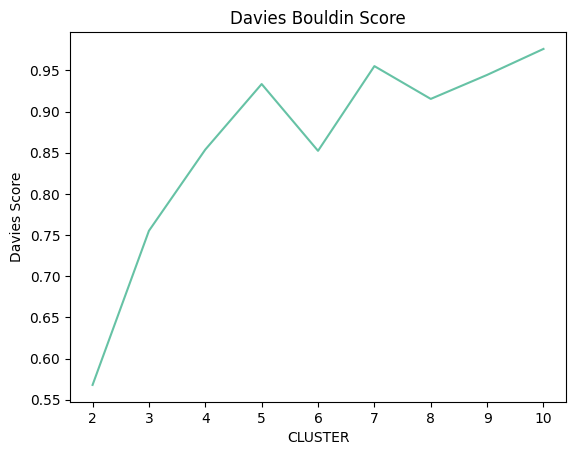

In [ ]:
# DAVIES BOULDIN SCORE

k_range = range(2,11)
davies_score = []

for k in k_range:
    kmean = KMeans(n_clusters=k, init='k-means++', random_state=12, n_init=10)
    kmean.fit(X= data_reduced)
    davies = davies_bouldin_score(X= data_reduced, labels=kmean.labels_)
    davies_score.append(davies)

plt.plot(k_range, davies_score)
plt.title('Davies Bouldin Score')
plt.xlabel('CLUSTER')
plt.ylabel('Davies Score')
plt.show()

In [ ]:
# K-MEANS
fixed_kmean = KMeans(n_clusters=3, init='k-means++', random_state=12, n_init=1)
fixed_kmean.fit(data_reduced)

KMeans(n_clusters=3, n_init=1, random_state=12)

In [ ]:
# EVALUATION

wcss = fixed_kmean.inertia_
sil_coef = silhouette_score(X= data_reduced, labels=fixed_kmean.labels_)
davies_bouldin = davies_bouldin_score(X= data_reduced, labels= fixed_kmean.labels_)

print(f'WCSS Score : {wcss}')
print(f'Silhouette Coefficient Score : {sil_coef}')
print(f'Davies Bouldin Score : {davies_bouldin}')

WCSS Score : 196295135.05833995
Silhouette Coefficient Score : 0.5846878808394937
Davies Bouldin Score : 0.755223382303169


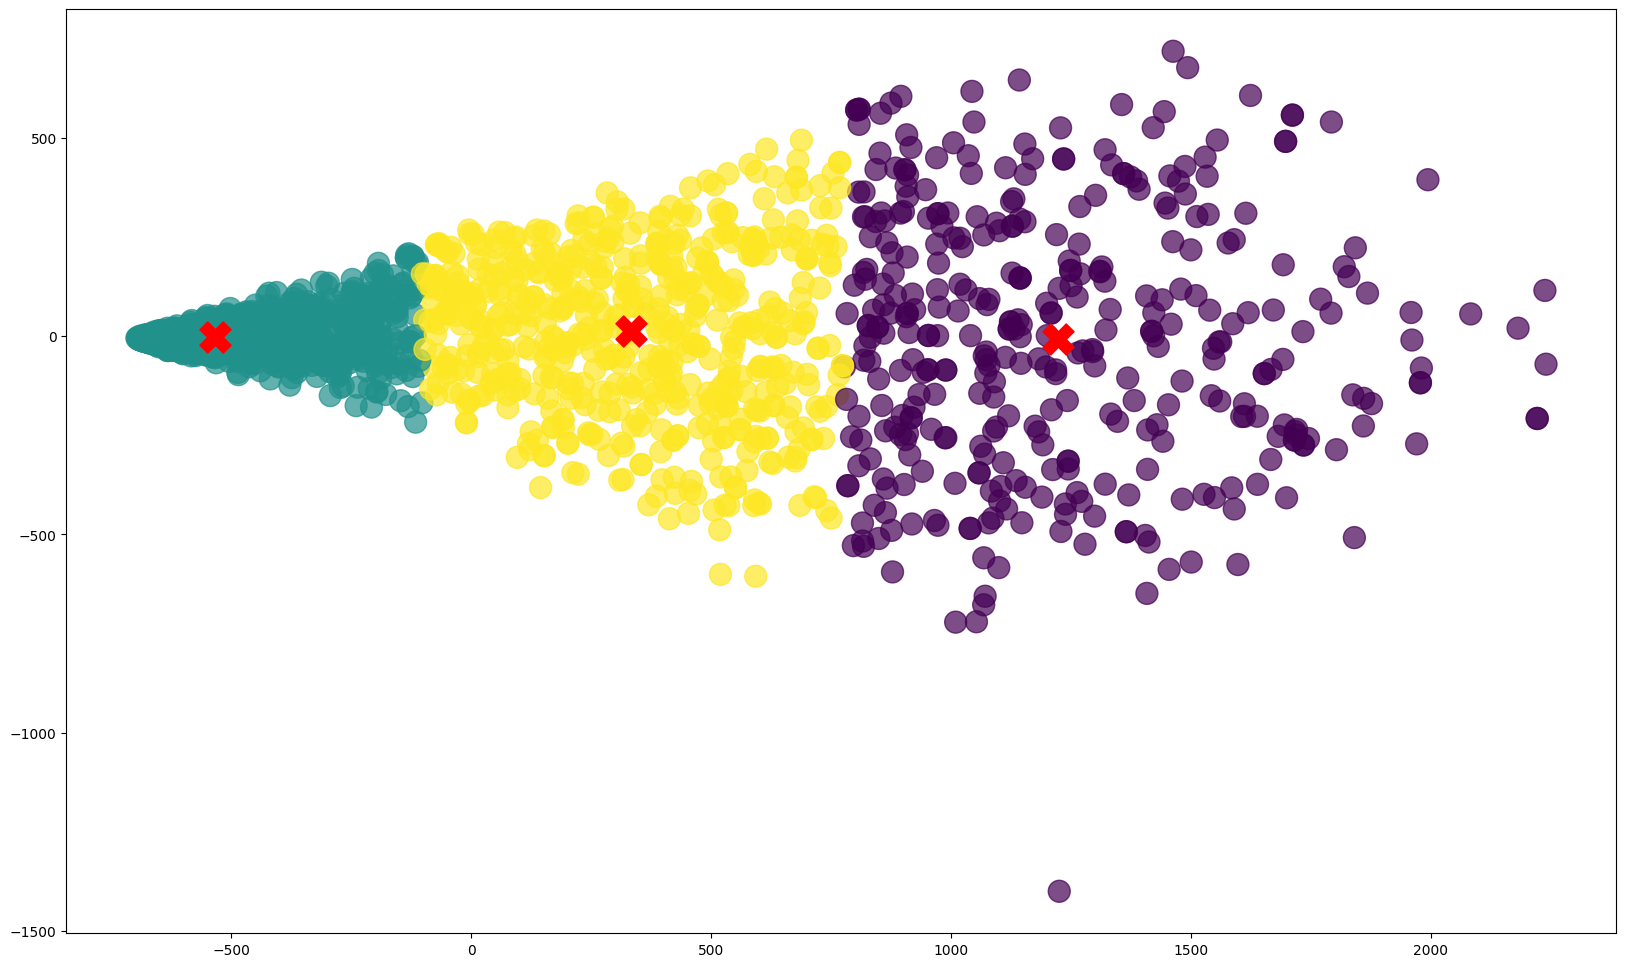

In [ ]:
# VISUALIZE K-MEANS USING 2D SCATTER PLOT
centroids = fixed_kmean.cluster_centers_
# SCATTER PLOT
plt.figure(figsize=(20,12))
plt.scatter(x= data_reduced[:,0], y= data_reduced[:,1], c= fixed_kmean.labels_, cmap='viridis', s=250, alpha=0.7)
plt.scatter(x= centroids[:,0], y=centroids[:,1], c='red', marker='X', label='Centroid', s=500)

C:\Users\hp\ml\my_env\lib\site-packages\matplotlib\collections.py:1008: RuntimeWarning:

invalid value encountered in sqrt



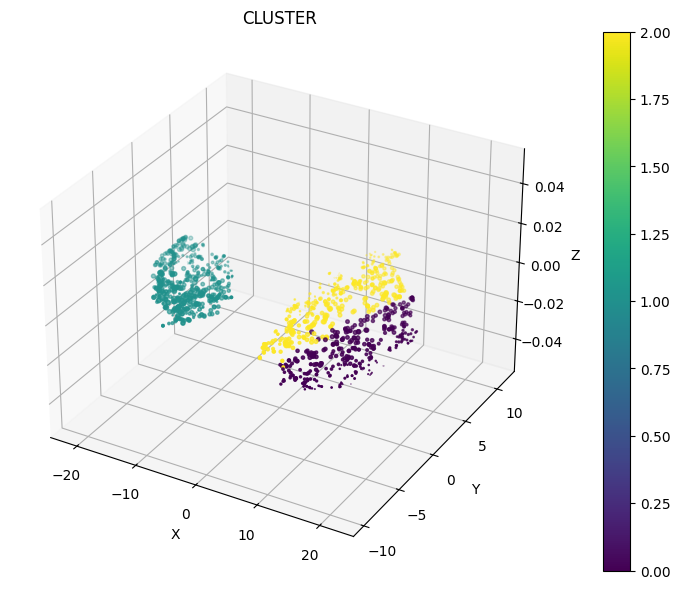

In [ ]:
# VISUALIZE 3D SCATTER PLOT USING TSNE
tsne = TSNE(n_components=3)
tsne_data = tsne.fit_transform(data_reduced)

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1,projection='3d')

scatter = plt.scatter(x = tsne_data[:,0], y= tsne_data[:,1], s= tsne_data[:,2], c=fixed_kmean.labels_)

ax.set_title('CLUSTER')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.colorbar(scatter)

plt.show()

In [ ]:
# SAVE A K-MEAN CLUSTER TO DATAFRAME
data_kmean = pd.DataFrame(data= df_cluster, columns=df_cluster.columns)
prediction = fixed_kmean.predict(data_reduced)

#RETURN INCOME VALUE BACK TO THE NORMAL
data_kmean['Revenu_Annuel'] = robust.inverse_transform(data_kmean[['Revenu_Annuel']])

# ADD CLUSTER COLUMN TO DATAFRAME
data_kmean['Cluster'] = prediction + 1
data_kmean.head(5)

,Revenu_Annuel,Age,Niveau_Education,Statut_Marital,Nb_Jeunes_Enfants,Nb_Adolescents,Jours_Dernier_Contact,Depenses_Vins,Depenses_Fruits,Depenses_Viande,Depenses_Poisson,Depenses_Sucreries,Depenses_Produits_Luxe,Total,Nb_Achats_Promos,Nb_Achats_Web,Nb_Achats_Catalogue,Nb_Achats_Magasin,Cluster
0,58138.0,68,2,4,0,0,58,635,88,546,172,88,88,1617,3,8,10,4,1
1,46344.0,71,2,4,1,1,38,11,1,6,2,1,6,27,2,1,1,2,2
2,71613.0,60,2,5,0,0,26,426,49,127,111,21,42,776,1,8,2,10,3
3,26646.0,41,2,5,1,0,26,11,4,20,10,3,5,53,2,2,0,4,2
4,58293.0,44,4,3,1,0,94,173,43,118,46,27,15,422,5,5,3,6,2


In [ ]:
# DISPLAY THE NUMBER OF EACH CLUSTER
data_kmean.groupby('Cluster')['Age'].count()

Cluster
1     376
2    1232
3     600
Name: Age, dtype: int64

<Axes: >

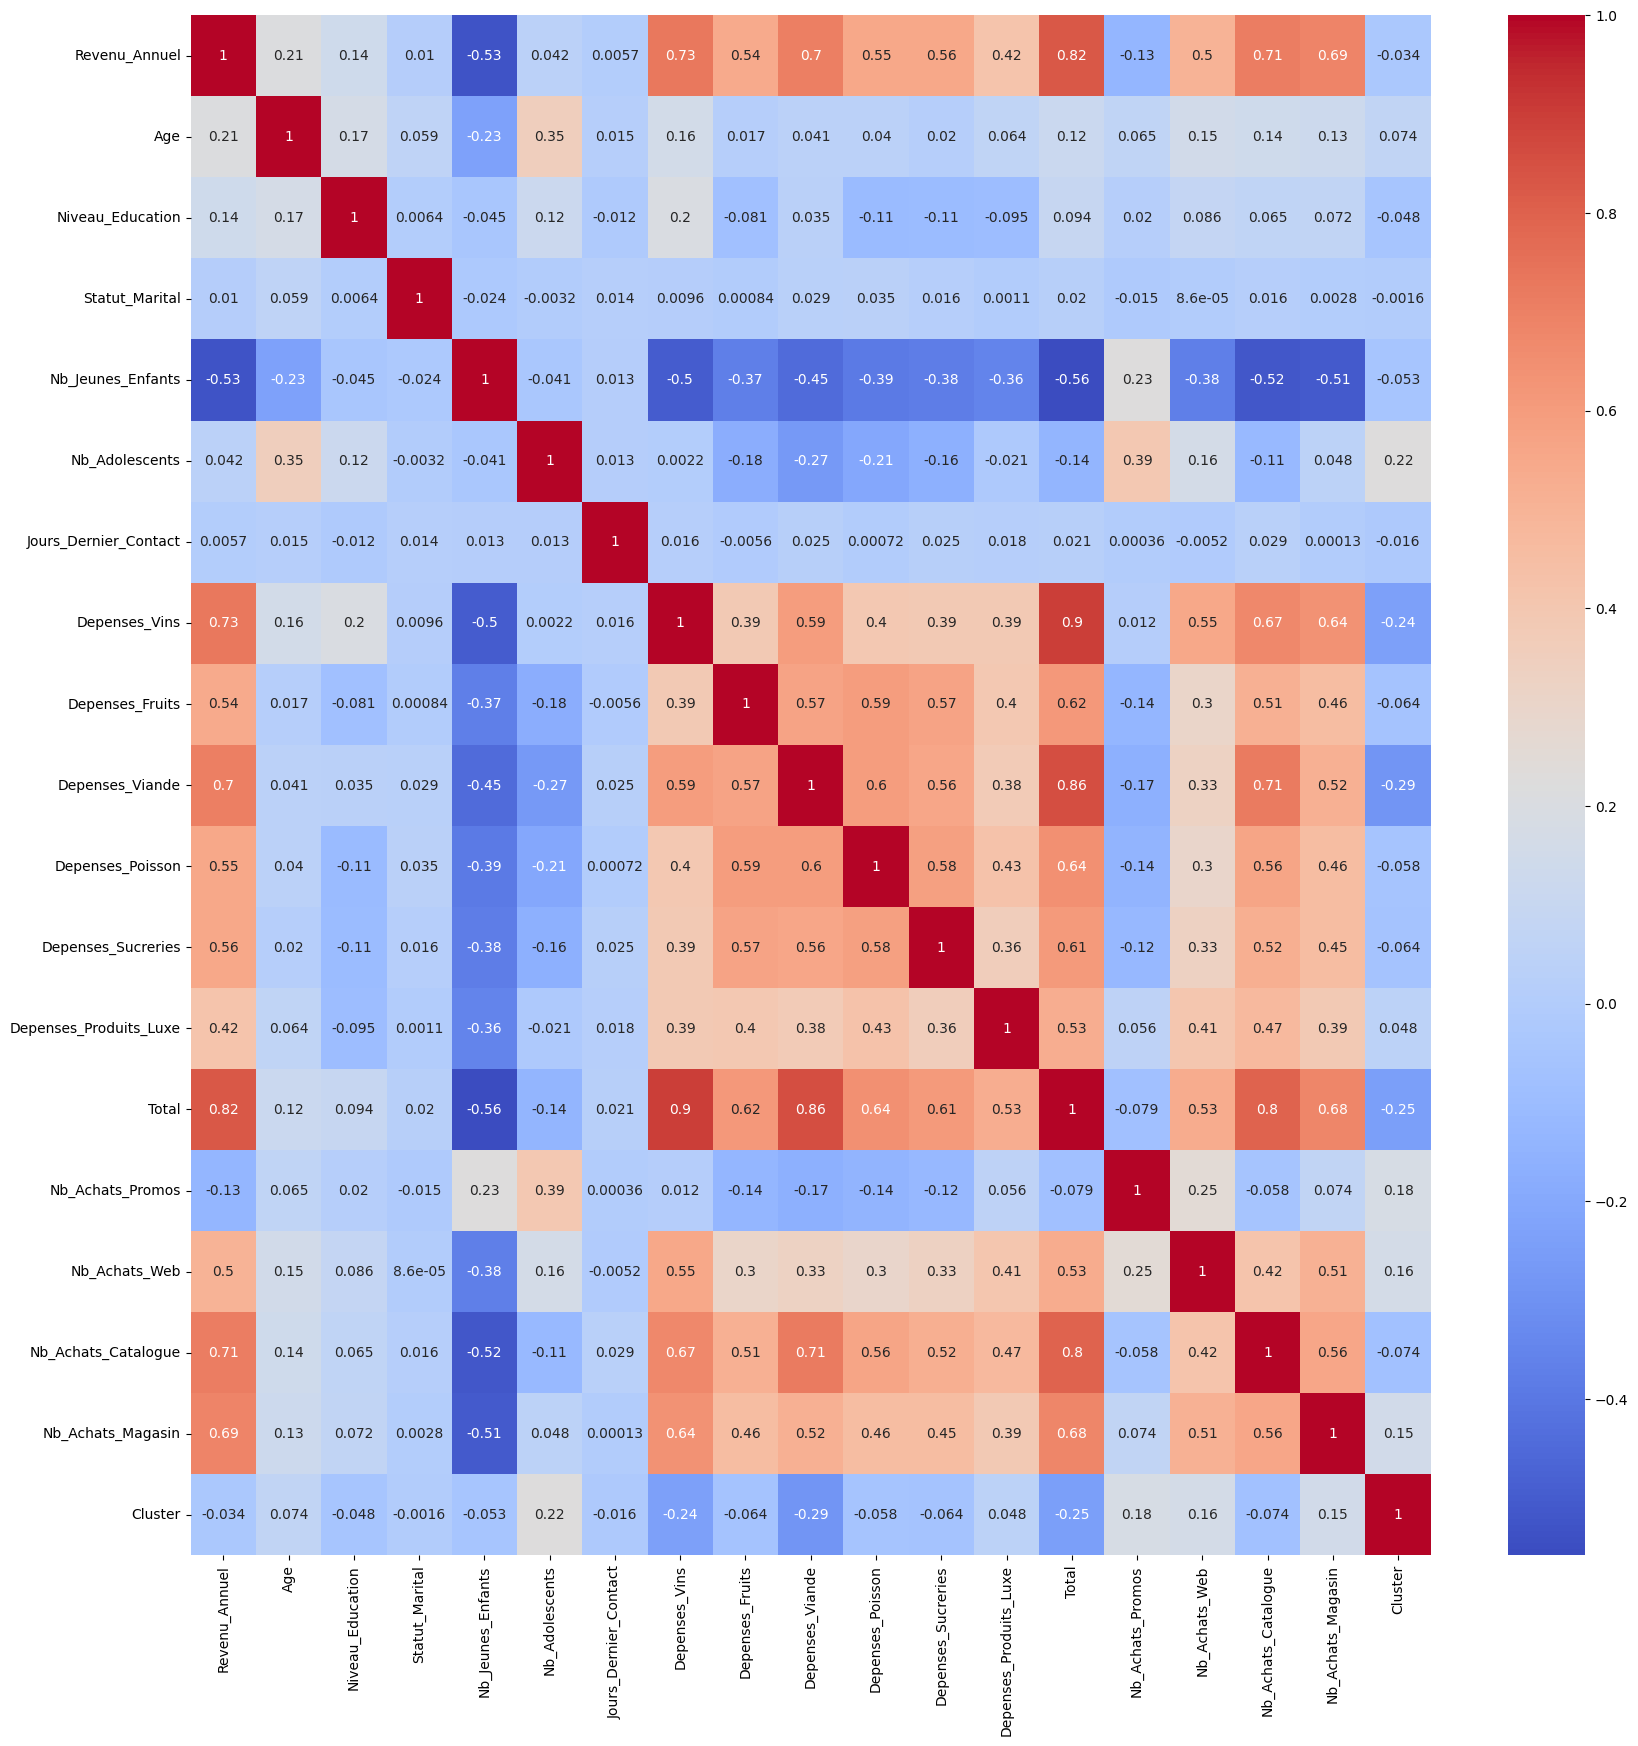

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data= data_kmean.corr(), annot=True, cmap='coolwarm')

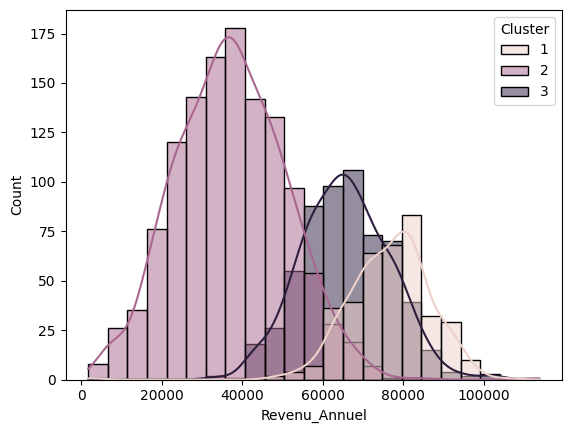

In [ ]:
sns.histplot(data=data_kmean, x='Revenu_Annuel', hue=data_kmean['Cluster'], kde=True)
plt.show()

In [ ]:
data_kmean.groupby('Cluster')['Revenu_Annuel'].mean()

Cluster
1    76596.377660
2    37221.489448
3    65583.266667
Name: Revenu_Annuel, dtype: float64

<Axes: xlabel='Total', ylabel='Count'>

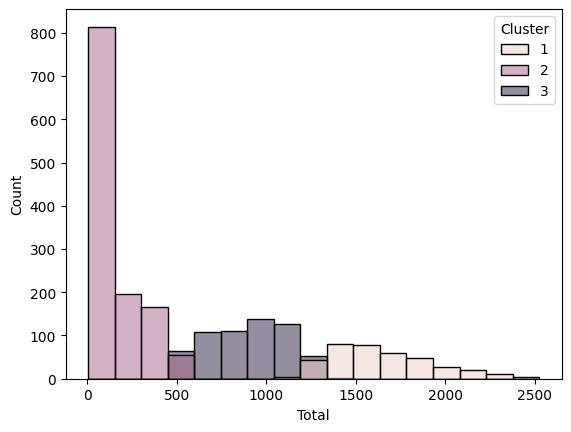

In [ ]:
sns.histplot(data=data_kmean, x='Total', hue='Cluster')

In [ ]:
data_kmean.groupby('Cluster')['Total'].mean()

Cluster
1    1645.976064
2     147.859578
3     898.220000
Name: Total, dtype: float64

Text(0.5, 1.0, 'Age')

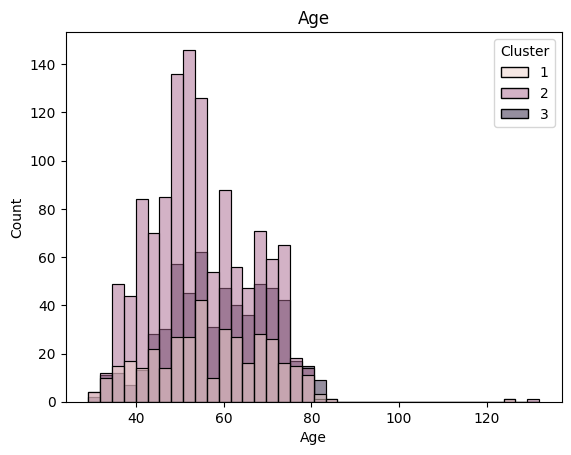

In [ ]:
sns.histplot(data=data_kmean, x='Age', hue='Cluster')
plt.title('Age')

<Axes: xlabel='Nb_Adolescents', ylabel='count'>

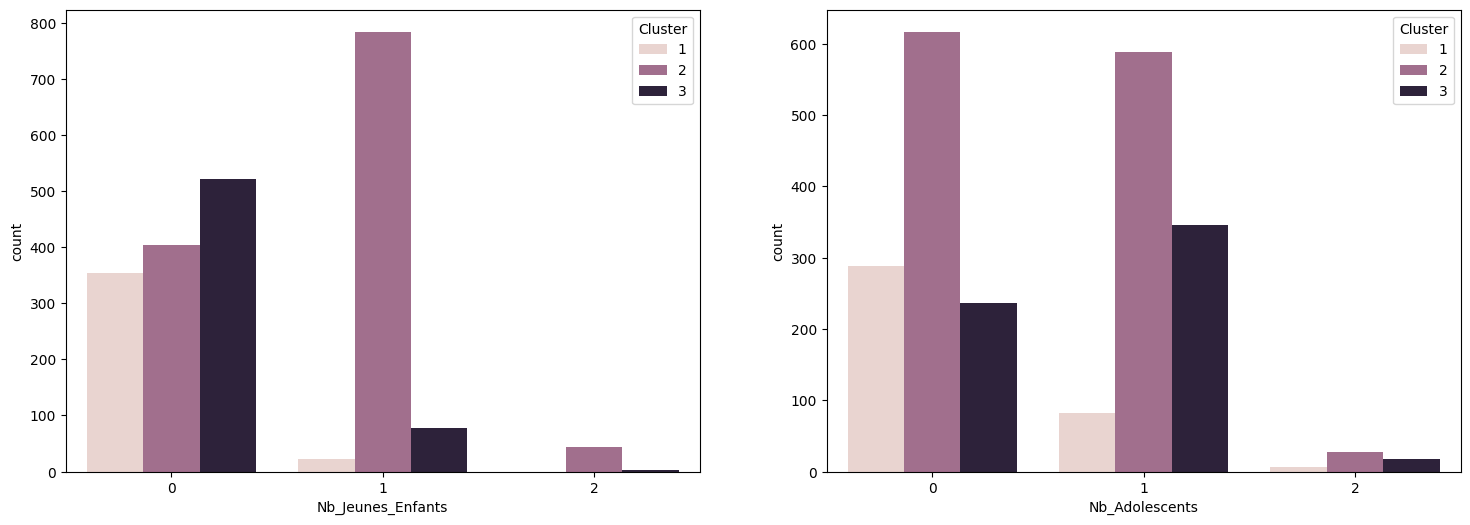

In [ ]:
fig , axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(data=data_kmean, x='Nb_Jeunes_Enfants', hue='Cluster', ax=axes[0])
sns.countplot(data=data_kmean, x='Nb_Adolescents', hue='Cluster', ax=axes[1])

<Axes: xlabel='Jours_Dernier_Contact', ylabel='Count'>

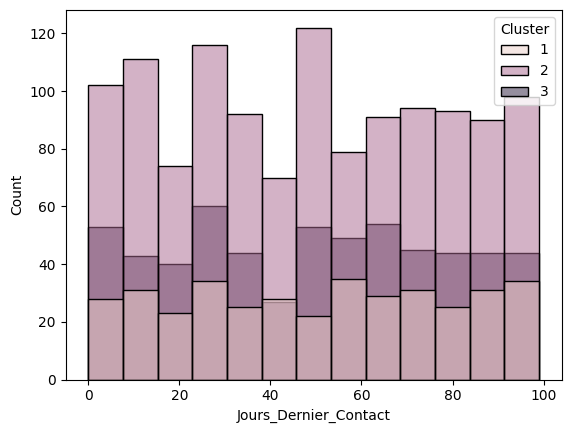

In [ ]:
sns.histplot(data=data_kmean, x='Jours_Dernier_Contact', hue='Cluster')

Cluster
1    1.630319
2    2.327922
3    2.723333
Name: Nb_Achats_Promos, dtype: float64

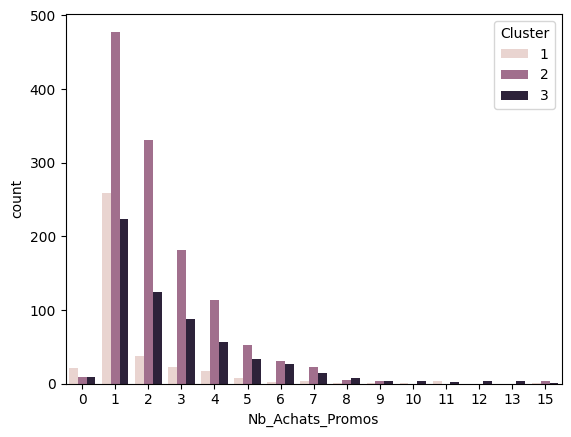

In [ ]:
sns.countplot(data=data_kmean, x='Nb_Achats_Promos', hue='Cluster')
data_kmean.groupby('Cluster')['Nb_Achats_Promos'].mean()

In [ ]:
# SEPARATE THE DATA FOR EACH CLUSTER

Cluster_1 = data_kmean[data_kmean['Cluster'] == 1]  # CLUSTER 1
Cluster_2 = data_kmean[data_kmean['Cluster'] == 2]  # CLUSTER 2
Cluster_3 = data_kmean[data_kmean['Cluster'] == 3]  # CLUSTER 3

len(Cluster_1) , len(Cluster_2) , len(Cluster_3)

(376, 1232, 600)

In [ ]:
Cluster_1.describe()

,Revenu_Annuel,Age,Niveau_Education,Statut_Marital,Nb_Jeunes_Enfants,Nb_Adolescents,Jours_Dernier_Contact,Depenses_Vins,Depenses_Fruits,Depenses_Viande,Depenses_Poisson,Depenses_Sucreries,Depenses_Produits_Luxe,Total,Nb_Achats_Promos,Nb_Achats_Web,Nb_Achats_Catalogue,Nb_Achats_Magasin,Cluster
count,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.0
mean,76596.377660,56.986702,2.617021,3.728723,0.061170,0.250000,50.444149,849.771277,63.162234,502.082447,88.691489,64.757979,77.510638,1645.976064,1.630319,5.585106,6.090426,8.367021,1.0
std,10204.619306,13.188574,1.044160,1.040935,0.239962,0.469042,29.115898,277.880168,49.016272,250.739719,66.681816,52.309667,62.858952,285.713212,1.723264,2.358122,2.577299,2.825291,0.0
min,2447.000000,30.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,45.000000,0.000000,0.000000,0.000000,1178.000000,0.000000,0.000000,2.000000,0.000000,1.0
25%,70255.750000,47.000000,2.000000,3.000000,0.000000,0.000000,25.750000,644.000000,24.000000,309.000000,34.750000,24.000000,30.000000,1427.750000,1.000000,4.000000,4.000000,6.000000,1.0
50%,77621.000000,56.000000,2.000000,4.000000,0.000000,0.000000,52.500000,854.000000,51.000000,485.000000,75.000000,48.500000,54.500000,1596.500000,1.000000,5.000000,6.000000,8.000000,1.0
75%,82800.000000,67.000000,4.000000,5.000000,0.000000,0.000000,74.250000,1025.250000,97.250000,706.000000,133.000000,99.250000,111.000000,1825.250000,2.000000,7.000000,8.000000,11.000000,1.0
max,105471.000000,126.000000,4.000000,6.000000,1.000000,2.000000,99.000000,1493.000000,190.000000,1725.000000,258.000000,198.000000,249.000000,2525.000000,15.000000,11.000000,28.000000,13.000000,1.0


In [ ]:
Cluster_2.describe()

,Revenu_Annuel,Age,Niveau_Education,Statut_Marital,Nb_Jeunes_Enfants,Nb_Adolescents,Jours_Dernier_Contact,Depenses_Vins,Depenses_Fruits,Depenses_Viande,Depenses_Poisson,Depenses_Sucreries,Depenses_Produits_Luxe,Total,Nb_Achats_Promos,Nb_Achats_Web,Nb_Achats_Catalogue,Nb_Achats_Magasin,Cluster
count,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1232.0
mean,37221.489448,54.664773,2.316558,3.725649,0.707792,0.521104,48.702922,69.307630,7.034903,33.025162,10.426948,7.247565,20.817370,147.859578,2.327922,2.672078,0.785714,3.686688,2.0
std,13620.529946,11.559423,1.138836,1.053126,0.527709,0.541871,29.050661,85.272376,12.200981,36.877674,18.726459,14.607330,28.535922,141.260833,1.668147,2.075253,0.999362,1.592290,0.0
min,1730.000000,29.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,27379.500000,47.000000,2.000000,3.000000,0.000000,0.000000,24.000000,10.000000,1.000000,9.000000,2.000000,1.000000,5.000000,43.000000,1.000000,1.000000,0.000000,3.000000,2.0
50%,36967.000000,53.000000,2.000000,4.000000,1.000000,0.000000,49.000000,29.500000,3.000000,18.000000,4.000000,3.000000,12.000000,79.000000,2.000000,2.000000,1.000000,3.000000,2.0
75%,46380.250000,63.000000,3.000000,5.000000,1.000000,1.000000,74.000000,100.000000,8.000000,45.000000,12.000000,8.000000,26.000000,233.000000,3.000000,3.000000,1.000000,4.000000,2.0
max,113734.000000,132.000000,4.000000,7.000000,2.000000,2.000000,99.000000,416.000000,151.000000,288.000000,179.000000,262.000000,321.000000,577.000000,15.000000,27.000000,9.000000,13.000000,2.0


In [ ]:
Cluster_3.describe()

,Revenu_Annuel,Age,Niveau_Education,Statut_Marital,Nb_Jeunes_Enfants,Nb_Adolescents,Jours_Dernier_Contact,Depenses_Vins,Depenses_Fruits,Depenses_Viande,Depenses_Poisson,Depenses_Sucreries,Depenses_Produits_Luxe,Total,Nb_Achats_Promos,Nb_Achats_Web,Nb_Achats_Catalogue,Nb_Achats_Magasin,Cluster
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.0
mean,65583.266667,58.833333,2.403333,3.723333,0.135000,0.636667,48.756667,451.616667,43.255000,226.03000,61.961667,44.346667,71.010000,898.220000,2.723333,6.095000,4.303333,8.601667,3.0
std,11003.257939,11.583286,1.123726,1.148472,0.351636,0.540193,28.616411,185.384921,46.201417,147.75818,61.757998,45.593066,56.728271,217.762637,2.249123,2.387217,2.308001,2.707745,0.0
min,33051.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.000000,0.000000,21.00000,0.000000,0.000000,0.000000,486.000000,0.000000,1.000000,1.000000,3.000000,3.0
25%,57949.750000,50.000000,2.000000,3.000000,0.000000,0.000000,24.000000,316.750000,9.000000,115.00000,13.000000,9.000000,29.000000,725.000000,1.000000,4.000000,3.000000,6.000000,3.0
50%,65328.500000,59.000000,2.000000,3.000000,0.000000,1.000000,50.000000,434.000000,26.000000,184.50000,39.500000,29.000000,54.000000,907.500000,2.000000,6.000000,4.000000,8.000000,3.0
75%,72635.000000,69.000000,3.000000,5.000000,0.000000,1.000000,72.000000,571.250000,61.250000,305.00000,93.000000,64.000000,102.000000,1080.500000,4.000000,8.000000,6.000000,11.000000,3.0
max,102692.000000,82.000000,4.000000,6.000000,2.000000,2.000000,99.000000,1000.000000,199.000000,818.00000,259.000000,195.000000,248.000000,1367.000000,15.000000,11.000000,11.000000,13.000000,3.0
